# UPLOADING THE HOUSING DATA

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.ensemble import RandomForestClassifier

In [246]:
df = pd.read_csv(r"C:\Users\hp\Desktop\CSV FILE OF HOUSING DATA\housing_data.csv")
df

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0     No     No          No   
1         Reg         Lvl    AllPub  ...        0     No     No          No   
2         IR1         Lvl    AllPub  ...        0     No     No          No   
3         IR1         Lvl    AllPub  ...        0     No     No          No   
4         IR1         Lvl    AllPub  ...        0     No     No          No   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb   2008        WD         Normal     208500  
1          0    May   2007        WD         Normal     181500  
2          0    Sep   2008        WD         Normal     223500  
3          0    Feb   2006        WD        Abnorml     140000  
4          0    Dec   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# UPLOADING THE HOUSING DATA

In [249]:
df.shape

(1460, 81)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Finding All Null Value in All Coloumn.

In [254]:
df.isnull().sum().iloc[0:60]

Unnamed: 0         0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [256]:
# checking the missing value  in remaining coloumn.
df.isnull().sum().iloc[60:80]

GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [258]:
len(df)

1460

In [260]:
df.dtypes

Unnamed: 0        int64
MSSubClass       object
MSZoning         object
LotFrontage       int64
LotArea           int64
                  ...  
MoSold           object
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

In [262]:
df.drop_duplicates()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0     No     No          No   
1         Reg         Lvl    AllPub  ...        0     No     No          No   
2         IR1         Lvl    AllPub  ...        0     No     No          No   
3         IR1         Lvl    AllPub  ...        0     No     No          No   
4         IR1         Lvl    AllPub  ...        0     No     No          No   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb   2008        WD         Normal     208500  
1          0    May   2007        WD         Normal     181500  
2          0    Sep   2008        WD         Normal     223500  
3          0    Feb   2006        WD        Abnorml     140000  
4          0    Dec   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Find median and Mode and remove Null value of "Alley,MasvnrType,Electrical,GarageYrBlt"

In [265]:
#THERE ARE MISSING VALUES IN ["ALLEY" = 1369 , MasVnrType=872 , Electrical=1 , GarageYrBlt=81] 
# FILLING MISSING VALUES BY USING FILLNA FUNCTION.
df['Electrical']= df['Electrical'].fillna(df['Electrical']).mode()[0]
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt']).median()
df['Alley']= df['Alley'].fillna(df['Alley']).mode()[0]
df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType']).mode()[0]

# FILLING ALL MISSING VALUES.

In [268]:
# fill the missing value are filling in all four coloumn. 
df.isnull().sum().iloc[0:60]

Unnamed: 0      0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional

In [270]:
df.duplicated().sum()

0

In [272]:
df.describe()

Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

In [274]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

# Drop unnecessary Columns:

In [277]:
df1 = df.drop(['Alley','MasVnrType','Unnamed: 0'], axis=1)
df1

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          SC60       RL           65     8450   Pave      Reg         Lvl   
1          SC20       RL           80     9600   Pave      Reg         Lvl   
2          SC60       RL           68    11250   Pave      IR1         Lvl   
3          SC70       RL           60     9550   Pave      IR1         Lvl   
4          SC60       RL           84    14260   Pave      IR1         Lvl   
...         ...      ...          ...      ...    ...      ...         ...   
1455       SC60       RL           62     7917   Pave      Reg         Lvl   
1456       SC20       RL           85    13175   Pave      Reg         Lvl   
1457       SC70       RL           66     9042   Pave      Reg         Lvl   
1458       SC20       RL           68     9717   Pave      Reg         Lvl   
1459       SC20       RL           75     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... PoolArea PoolQC  Fence MiscFeature  \
0       AllPub    Inside       Gtl  ...        0     No     No          No   
1       AllPub       FR2       Gtl  ...        0     No     No          No   
2       AllPub    Inside       Gtl  ...        0     No     No          No   
3       AllPub    Corner       Gtl  ...        0     No     No          No   
4       AllPub       FR2       Gtl  ...        0     No     No          No   
...        ...       ...       ...  ...      ...    ...    ...         ...   
1455    AllPub    Inside       Gtl  ...        0     No     No          No   
1456    AllPub    Inside       Gtl  ...        0     No  MnPrv          No   
1457    AllPub    Inside       Gtl  ...        0     No  GdPrv        Shed   
1458    AllPub    Inside       Gtl  ...        0     No     No          No   
1459    AllPub    Inside       Gtl  ...        0     No     No          No   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0          0     Feb    2008        WD         Normal    208500  
1          0     May    2007        WD         Normal    181500  
2          0     Sep    2008        WD         Normal    223500  
3          0     Feb    2006        WD        Abnorml    140000  
4          0     Dec    2008        WD         Normal    250000  
...      ...     ...     ...       ...            ...       ...  
1455       0     Aug    2007        WD         Normal    175000  
1456       0     Feb    2010        WD         Normal    210000  
1457    2500     May    2010        WD         Normal    266500  
1458       0     Apr    2010        WD         Normal    142125  
1459       0     Jun    2008        WD         Normal    147500  

[1460 rows x 78 columns]

# Replaced the coloumn "MSSubClass"= type of dwelling.

In [280]:
df1=df1.rename(columns={"MSSubClass":"type of dwelling"})
df1

type of dwelling MSZoning  LotFrontage  LotArea Street LotShape  \
0                SC60       RL           65     8450   Pave      Reg   
1                SC20       RL           80     9600   Pave      Reg   
2                SC60       RL           68    11250   Pave      IR1   
3                SC70       RL           60     9550   Pave      IR1   
4                SC60       RL           84    14260   Pave      IR1   
...               ...      ...          ...      ...    ...      ...   
1455             SC60       RL           62     7917   Pave      Reg   
1456             SC20       RL           85    13175   Pave      Reg   
1457             SC70       RL           66     9042   Pave      Reg   
1458             SC20       RL           68     9717   Pave      Reg   
1459             SC20       RL           75     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope  ... PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside       Gtl  ...        0     No     No   
1            Lvl    AllPub       FR2       Gtl  ...        0     No     No   
2            Lvl    AllPub    Inside       Gtl  ...        0     No     No   
3            Lvl    AllPub    Corner       Gtl  ...        0     No     No   
4            Lvl    AllPub       FR2       Gtl  ...        0     No     No   
...          ...       ...       ...       ...  ...      ...    ...    ...   
1455         Lvl    AllPub    Inside       Gtl  ...        0     No     No   
1456         Lvl    AllPub    Inside       Gtl  ...        0     No  MnPrv   
1457         Lvl    AllPub    Inside       Gtl  ...        0     No  GdPrv   
1458         Lvl    AllPub    Inside       Gtl  ...        0     No     No   
1459         Lvl    AllPub    Inside       Gtl  ...        0     No     No   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0             No       0     Feb    2008        WD         Normal    208500  
1             No       0     May    2007        WD         Normal    181500  
2             No       0     Sep    2008        WD         Normal    223500  
3             No       0     Feb    2006        WD        Abnorml    140000  
4             No       0     Dec    2008        WD         Normal    250000  
...          ...     ...     ...     ...       ...            ...       ...  
1455          No       0     Aug    2007        WD         Normal    175000  
1456          No       0     Feb    2010        WD         Normal    210000  
1457        Shed    2500     May    2010        WD         Normal    266500  
1458          No       0     Apr    2010        WD         Normal    142125  
1459          No       0     Jun    2008        WD         Normal    147500  

[1460 rows x 78 columns]

In [282]:
df1['type of dwelling'].value_counts()

type of dwelling
SC20     536
SC60     299
SC50     144
SC120     87
SC30      69
SC160     63
SC70      60
SC80      58
SC90      52
SC190     30
SC85      20
SC75      16
SC45      12
SC180     10
SC40       4
Name: count, dtype: int64

In [284]:
df1['type of dwelling']= df1['type of dwelling'].replace({'SC60':'2-STORY 1946 & NEWER','SC20':'1-STORY 1946 & NEWER ALL STYLES','SC70':'2-STORY 1945 & OLDER','SC50':'1-1/2 STORY FINISHED ALL AGES','SC120':'1-STORY PUD (Planned Unit Development) - 1946 & NEWER','SC160':'2-STORY PUD - 1946 & NEWER','SC80':' SPLIT OR MULTI-LEVEL','SC30':'1-STORY 1945 & OLDER','SC90':'DUPLEX - ALL STYLES AND AGES',
                                                                              'SC190':'2 FAMILY CONVERSION - ALL STYLES AND AGES','SC85':'SPLIT FOYER','SC75':'2-1/2 STORY ALL AGES','SC45':' 1-1/2 STORY - UNFINISHED ALL AGES','SC180':'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER','SC40':'1-STORY W/FINISHED ATTIC ALL AGES'}) 

In [286]:
df1.sample(3)

type of dwelling MSZoning  LotFrontage  LotArea Street  \
242     1-1/2 STORY FINISHED ALL AGES       RM           63     5000   Pave   
1377    1-1/2 STORY FINISHED ALL AGES       RL           60    10998   Pave   
1287  1-STORY 1946 & NEWER ALL STYLES       RL            0    36500   Pave   

     LotShape LandContour Utilities LotConfig LandSlope  ... PoolArea PoolQC  \
242       Reg         Lvl    AllPub    Corner       Gtl  ...        0     No   
1377      Reg         Lvl    AllPub    Inside       Gtl  ...        0     No   
1287      IR1         Low    AllPub    Inside       Mod  ...        0     No   

     Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
242     No          No       0     Apr    2006        WD         Normal   
1377    No          No       0     Jul    2009        WD         Normal   
1287    No          No       0     Jun    2006        WD         Normal   

     SalePrice  
242      79000  
1377    117000  
1287    190000  

[3 rows x 78 columns]

# Univariate Analysis:
# Numeric variables:

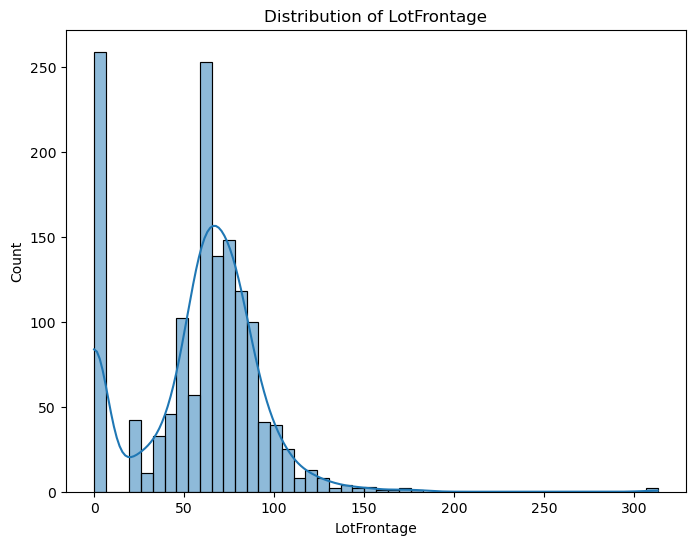

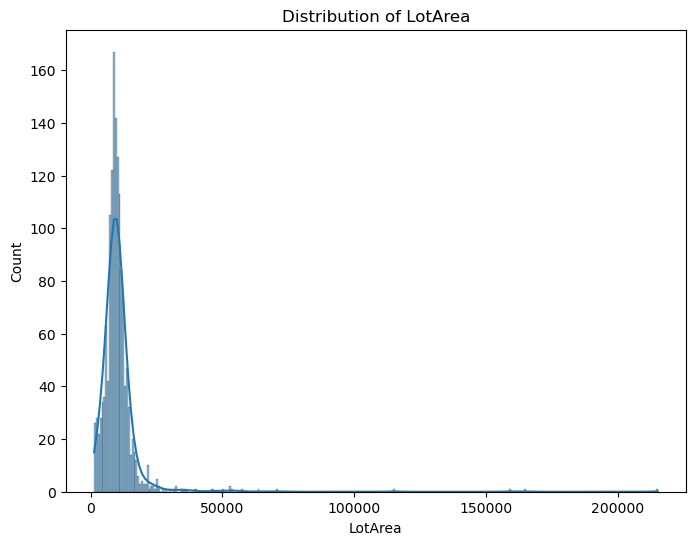

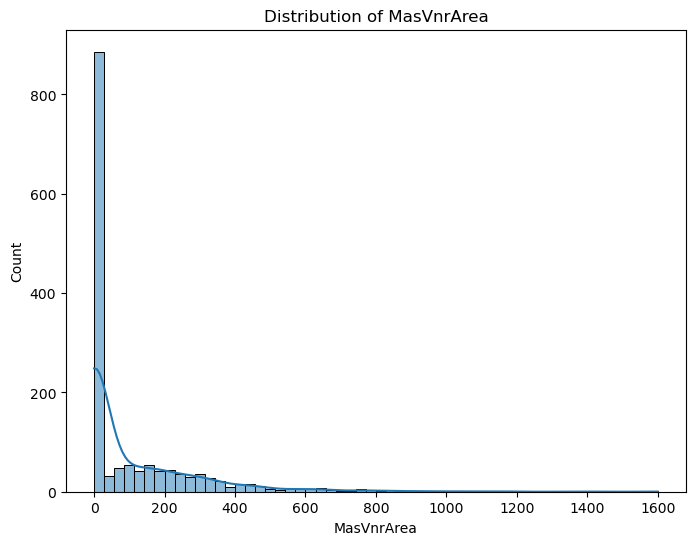

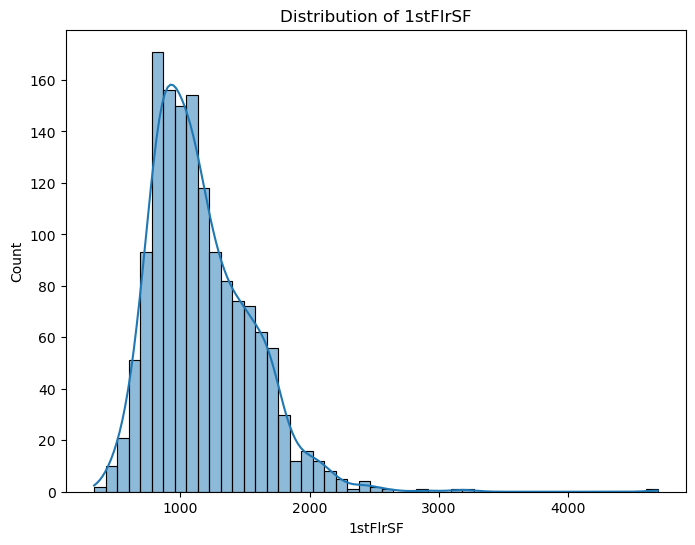

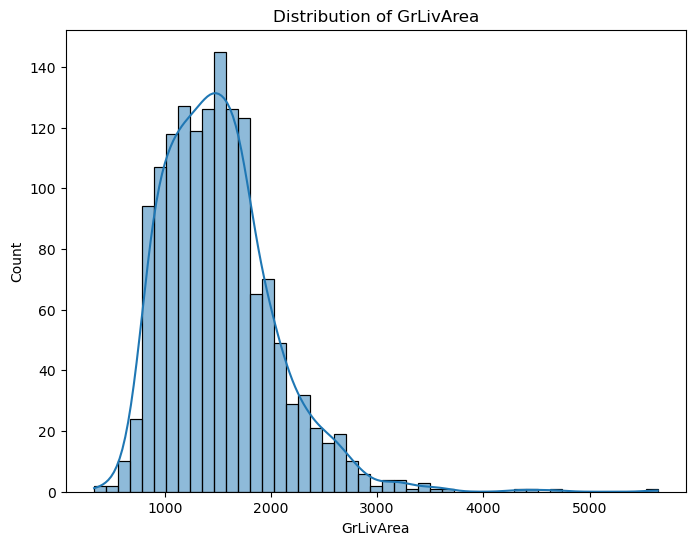

In [289]:
numeric_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', 'GrLivArea']
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data= df1, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

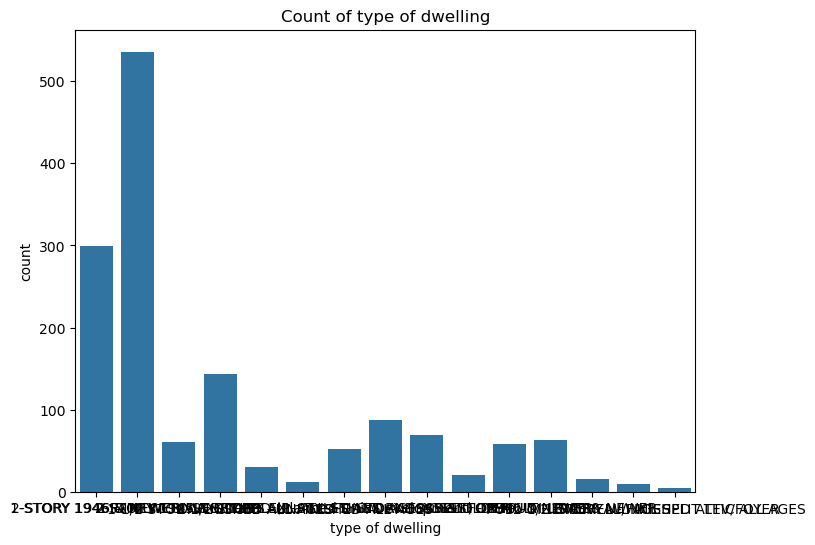

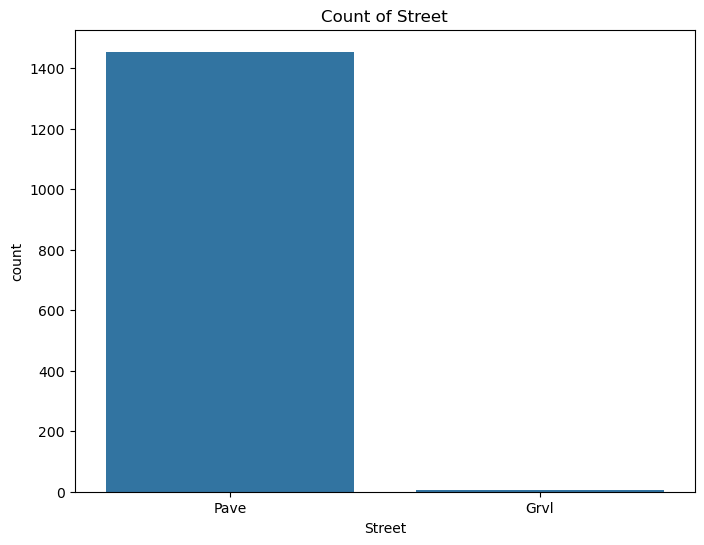

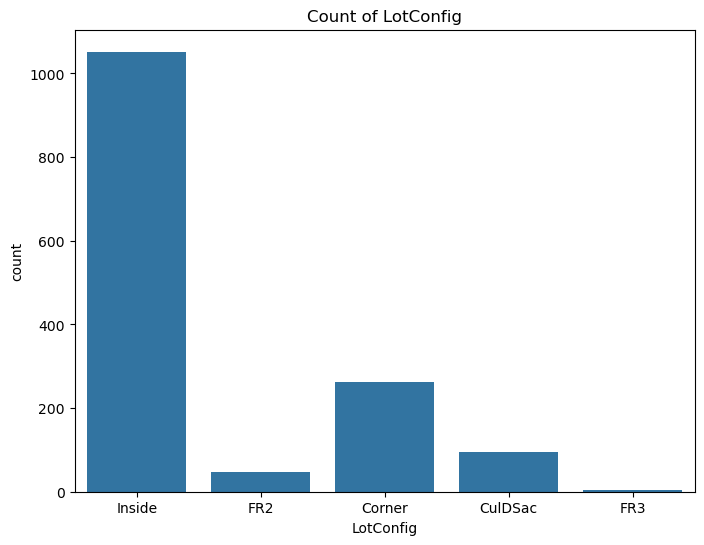

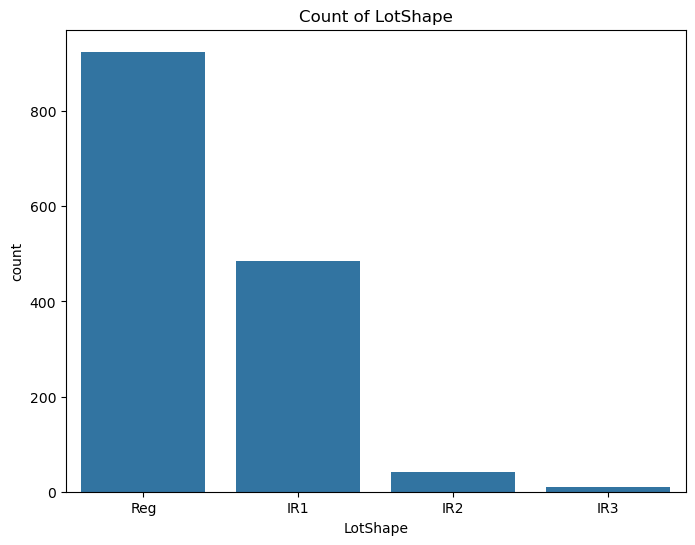

In [290]:
categorical_vars = ['type of dwelling', 'Street', 'LotConfig', 'LotShape']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df1, x=var)
    plt.title(f'Count of {var}')
    plt.show()

In [291]:
# Sale-price distribution:

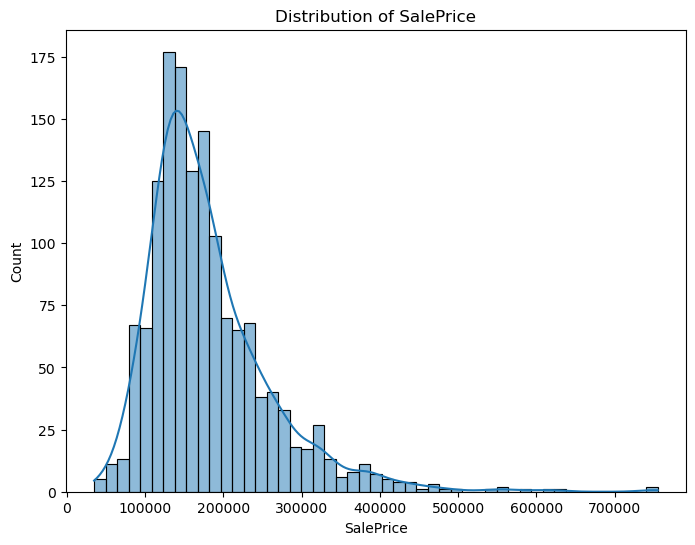

In [292]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='SalePrice', kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Box-plot:

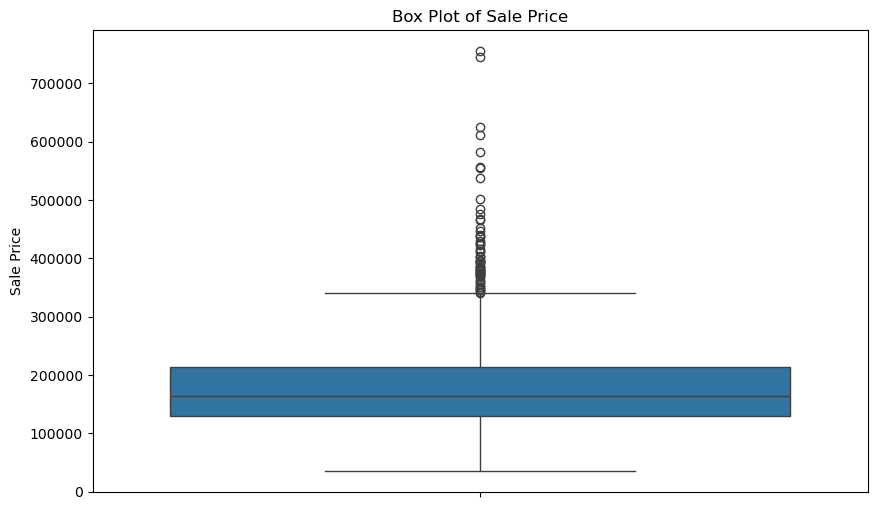

In [295]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='SalePrice')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price')
plt.show()

# Kernel Density Estimation:

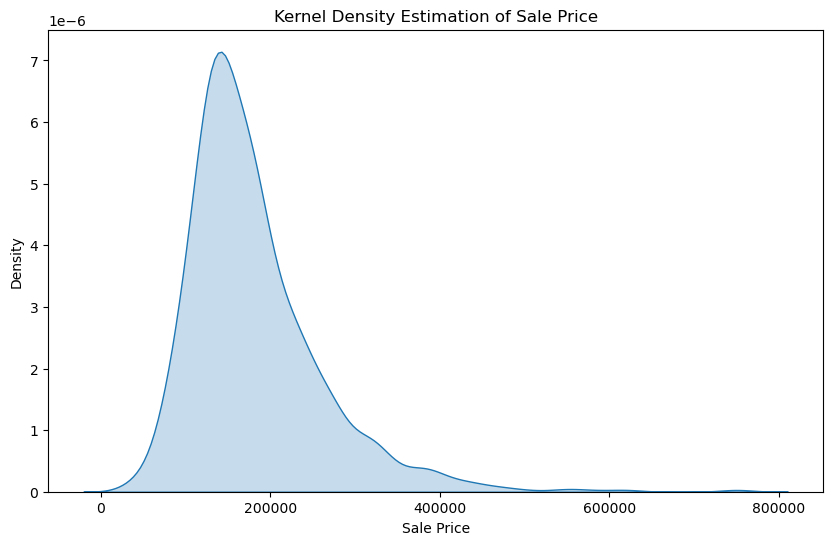

In [299]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df1['SalePrice'], shade=True)
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Sale Price')
plt.show()

# Violin-plot:

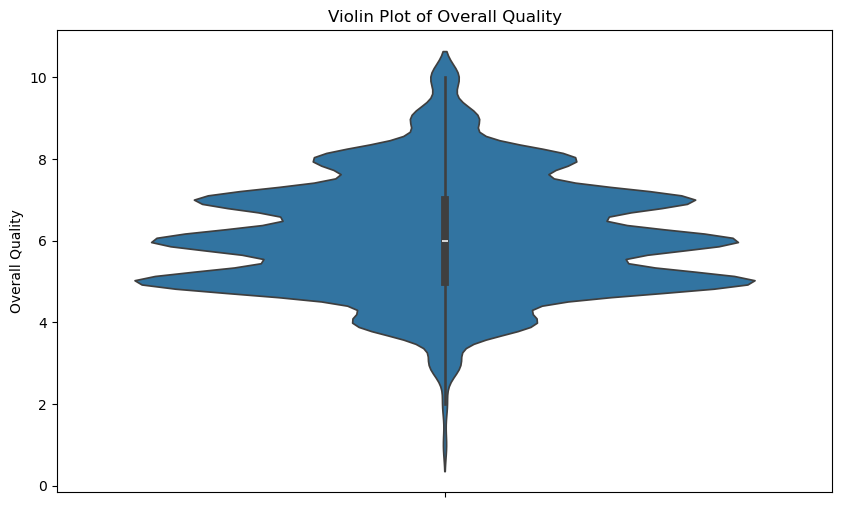

In [304]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1, y='OverallQual')
plt.ylabel('Overall Quality')
plt.title('Violin Plot of Overall Quality')
plt.show()

# Multivariate Analysis:

# object coloumn will be removed

In [308]:
exclude_df1=df1.select_dtypes(exclude=['object'])

In [310]:
exclude_df1

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0              65     8450            7            5       2003          2003   
1              80     9600            6            8       1976          1976   
2              68    11250            7            5       2001          2002   
3              60     9550            7            5       1915          1970   
4              84    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455           62     7917            6            5       1999          2000   
1456           85    13175            6            6       1978          1988   
1457           66     9042            7            9       1941          2006   
1458           68     9717            5            6       1950          1996   
1459           75     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  \
0            196         706           0        150  ...         548   
1              0         978           0        284  ...         460   
2            162         486           0        434  ...         608   
3              0         216           0        540  ...         642   
4            350         655           0        490  ...         836   
...          ...         ...         ...        ...  ...         ...   
1455           0           0           0        953  ...         460   
1456         119         790         163        589  ...         500   
1457           0         275           0        877  ...         252   
1458           0          49        1029          0  ...         240   
1459           0         830         290        136  ...         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1455           0           40              0          0            0   
1456         349            0              0          0            0   
1457           0           60              0          0            0   
1458         366            0            112          0            0   
1459         736           68              0          0            0   

      PoolArea  MiscVal  YrSold  SalePrice  
0            0        0    2008     208500  
1            0        0    2007     181500  
2            0        0    2008     223500  
3            0        0    2006     140000  
4            0        0    2008     250000  
...        ...      ...     ...        ...  
1455         0        0    2007     175000  
1456         0        0    2010     210000  
1457         0     2500    2010     266500  
1458         0        0    2010     142125  
1459         0        0    2008     147500  

[1460 rows x 35 columns]

In [312]:
exclude_df1.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

# Compute the correlation matrices:

In [315]:
corr_matrix = exclude_df1.corr()
corr_matrix

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.100739     0.176561    -0.053457   0.036853   
LotArea           0.100739  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.176561  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.053457 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.036853  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.078686  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.105010  0.103321     0.407252    -0.125694   0.311600   
BsmtFinSF1        0.076670  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2       -0.009312  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.160829 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.238274  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.245181  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF          0.042549  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF      0.049981  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea         0.220347  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath      0.010514  0.158155     0.111098    -0.054942   0.187599   
BsmtHalfBath     -0.027856  0.048046    -0.040150     0.117821  -0.038162   
FullBath          0.120548  0.126031     0.550600    -0.194149   0.468271   
HalfBath         -0.012952  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr      0.144494  0.119690     0.101676     0.012980  -0.070651   
KitchenAbvGr      0.034425 -0.017784    -0.183882    -0.087001  -0.174800   
TotRmsAbvGrd      0.221396  0.190015     0.427452    -0.057583   0.095589   
Fireplaces        0.044018  0.271364     0.396765    -0.023820   0.147716   
GarageYrBlt            NaN       NaN          NaN          NaN        NaN   
GarageCars        0.165229  0.154871     0.600671    -0.185758   0.537850   
GarageArea        0.201473  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF       -0.016780  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF       0.069605  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch     0.027366 -0.018340    -0.113937     0.070356  -0.387268   
3SsnPorch         0.023499  0.020423     0.030371     0.025504   0.031355   
ScreenPorch       0.022969  0.043160     0.064886     0.054811  -0.050364   
PoolArea          0.114106  0.077672     0.065166    -0.001985   0.004950   
MiscVal          -0.059606  0.038068    -0.031406     0.068777  -0.034383   
YrSold           -0.012094 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice         0.209624  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage        0.078686    0.105010    0.076670   -0.009312   0.160829   
LotArea            0.013788    0.103321    0.214103    0.111170  -0.002618   
OverallQual        0.550684    0.407252    0.239666   -0.059119   0.308159   
OverallCond        0.073741   -0.125694   -0.046231    0.040229  -0.136841   
YearBuilt          0.592855    0.311600    0.249503   -0.049107   0.149040   
YearRemodAdd       1.000000    0.176529    0.128451   -0.067759   0.181133   
MasVnrArea         0.176529    1.000000    0.261256   -0.071330   0.113862   
BsmtFinSF1         0.128451    0.261256    1.000000   -0.050117  -0.495251   
BsmtFinSF2        -0.067759   -0.071330   -0.050117    1.000000  -0.209294   
BsmtUnfSF          0.181133    0.113862   -0.495251   -0.209294   1.000000   
TotalBsmtSF        0.291066    0.360067    0.522396    0.104810   0.415360   
1stFlrSF           0.240379    0.339850    0.445863    0.097117   0.317987   
2ndFlrSF           0.140024    0.173800   -0.137079   -0.099260   0.004469   
LowQualFinSF      -0.062419   -0.068628   -0.064503    0.014807   0.028167   
GrLivArea          0.287389    0.388052    0.208171   -0.009640   0.2402

# Heat-map:

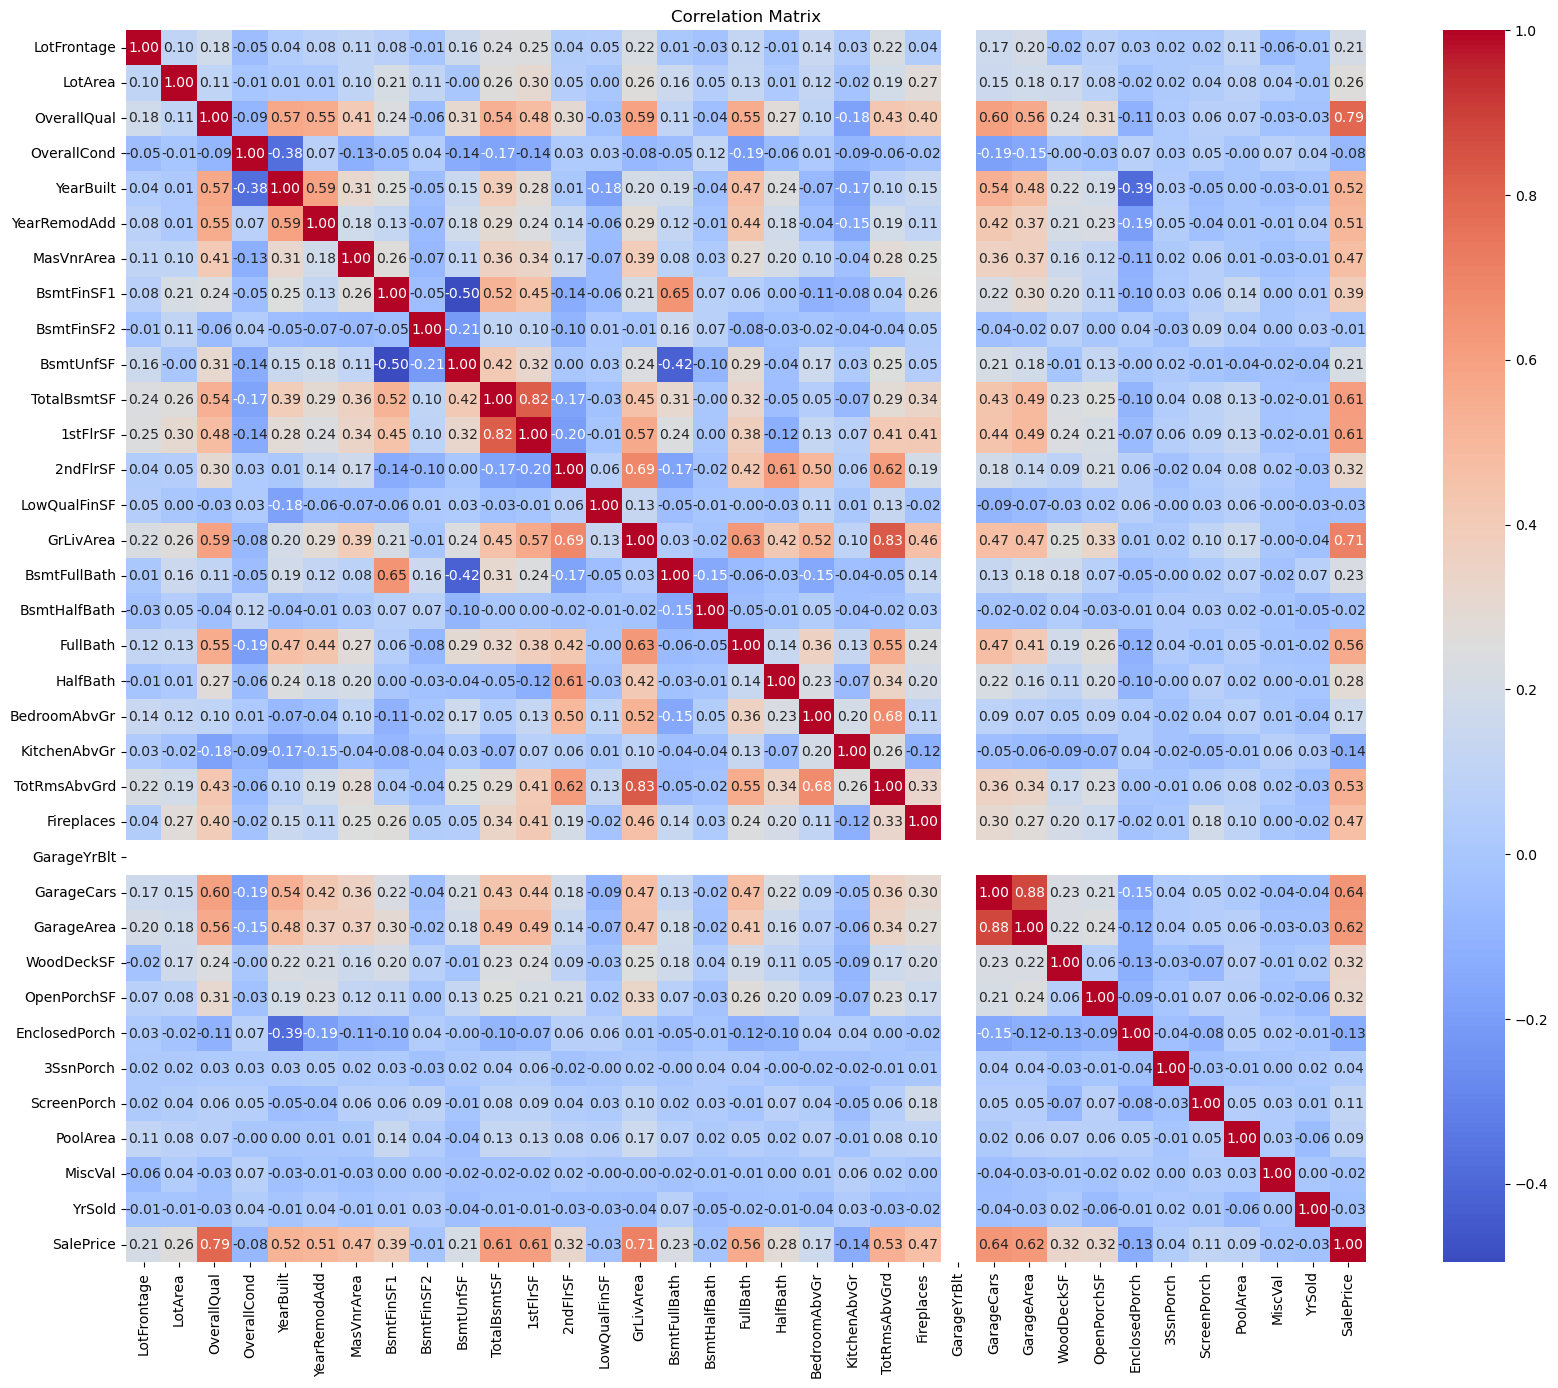

In [318]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pair-plot:

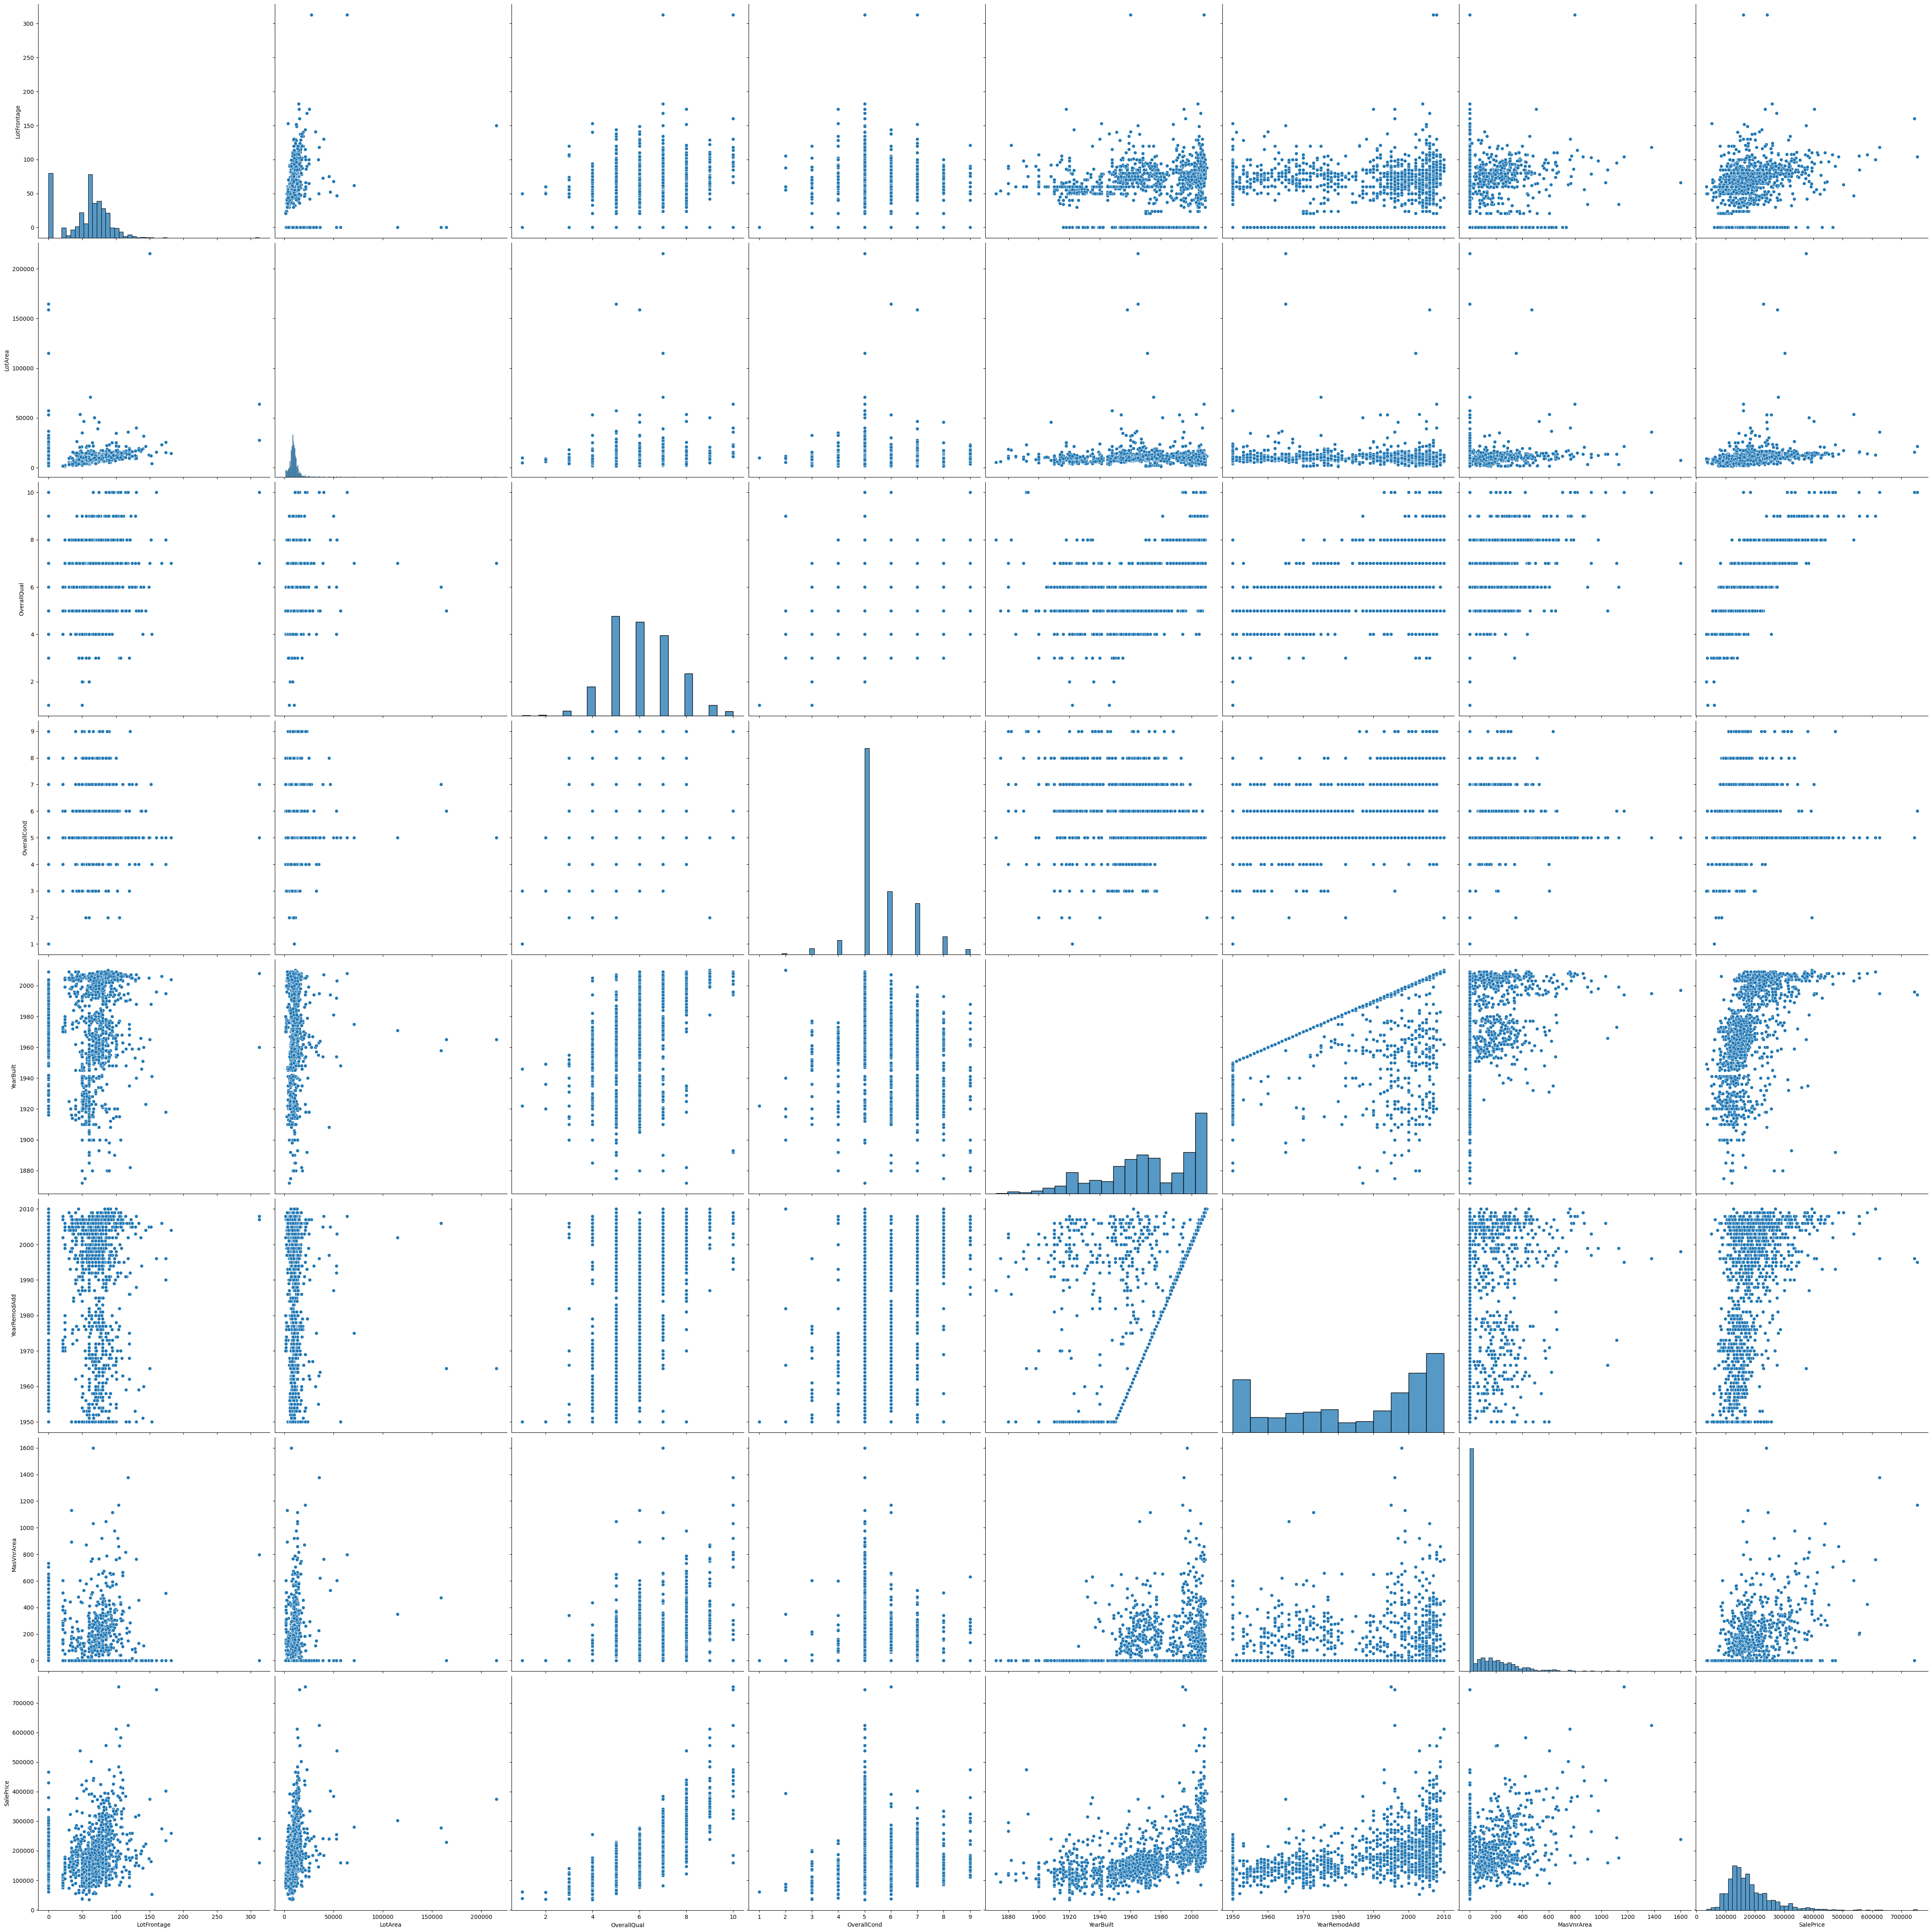

In [320]:
sns.pairplot(exclude_df1[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea','SalePrice']], height=6)
plt.show()

# Feature Engineering:

In [322]:
df1.head()

type of dwelling MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL           65     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL           80     9600   Pave   
2             2-STORY 1946 & NEWER       RL           68    11250   Pave   
3             2-STORY 1945 & OLDER       RL           60     9550   Pave   
4             2-STORY 1946 & NEWER       RL           84    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope  ... PoolArea PoolQC  \
0      Reg         Lvl    AllPub    Inside       Gtl  ...        0     No   
1      Reg         Lvl    AllPub       FR2       Gtl  ...        0     No   
2      IR1         Lvl    AllPub    Inside       Gtl  ...        0     No   
3      IR1         Lvl    AllPub    Corner       Gtl  ...        0     No   
4      IR1         Lvl    AllPub       FR2       Gtl  ...        0     No   

  Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0    No          No       0     Feb    2008        WD         Normal    208500  
1    No          No       0     May    2007        WD         Normal    181500  
2    No          No       0     Sep    2008        WD         Normal    223500  
3    No          No       0     Feb    2006        WD        Abnorml    140000  
4    No          No       0     Dec    2008        WD         Normal    250000  

[5 rows x 78 columns]

In [324]:
df1.columns

Index(['type of dwelling', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [325]:
df1.shape

(1460, 78)

In [326]:
# Calculate the price per square foot:

In [327]:
df1['PricePerSqFt'] = df1['SalePrice'] / (df1['GrLivArea'] + 
                                                            df1['TotalBsmtSF'])

In [328]:
df1['PricePerSqFt']

0       81.254871
1       71.909667
2       82.594235
3       56.611403
4       74.783129
          ...    
1455    67.307692
1456    58.091286
1457    76.317297
1458    65.920686
1459    58.718153
Name: PricePerSqFt, Length: 1460, dtype: float64

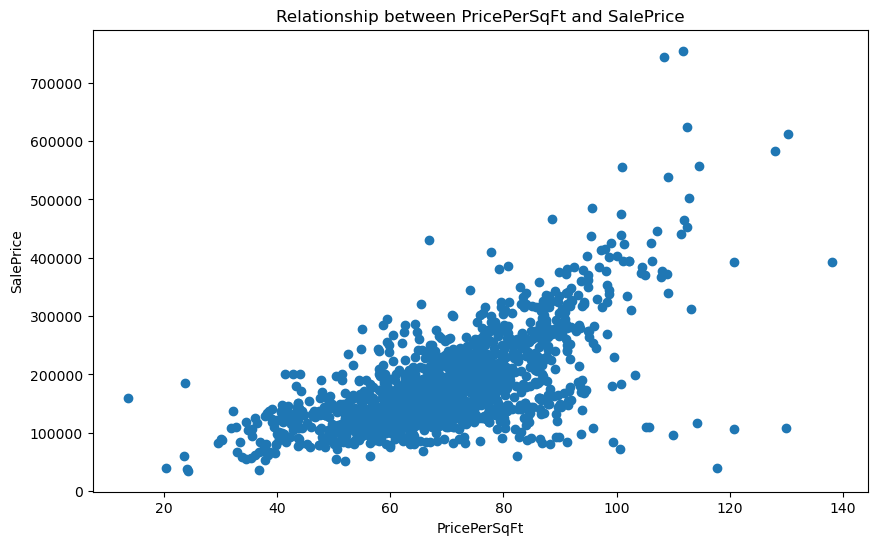

In [329]:
# Visualizing the New column created:
plt.figure(figsize=(10, 6))
plt.scatter(df1['PricePerSqFt'],df1['SalePrice'])
plt.xlabel('PricePerSqFt')
plt.ylabel('SalePrice')
plt.title('Relationship between PricePerSqFt and SalePrice')
plt.show()

In [330]:
# Calculate the age of property:
df1['AgeAtSale'] = df1['YrSold'] - df1['YearBuilt']
df1['AgeAtSale']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: AgeAtSale, Length: 1460, dtype: int64

In [331]:
# Dropping the Unwanted columns:
df1.drop(columns=['YearBuilt'],inplace=True)

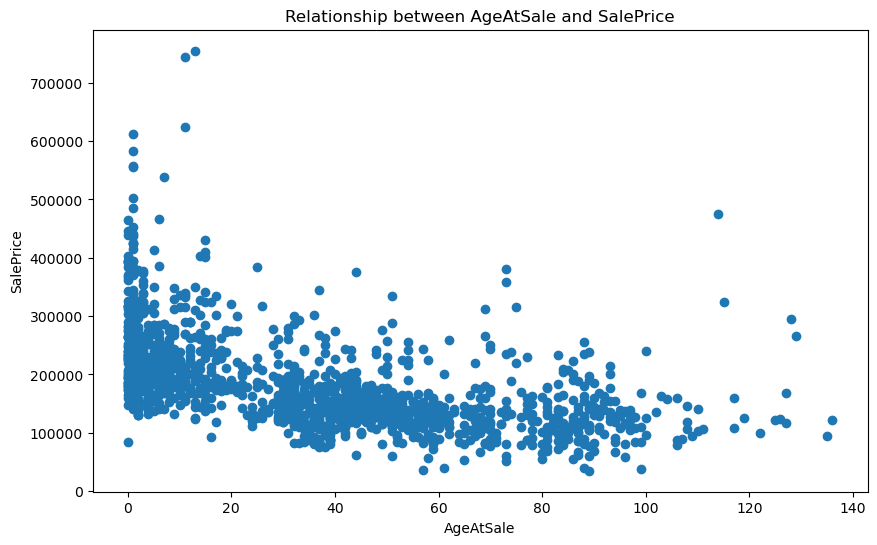

In [332]:
# Visualizing the New column created:
plt.figure(figsize=(10, 6))
plt.scatter(df1['AgeAtSale'],df1['SalePrice'])
plt.xlabel('AgeAtSale')
plt.ylabel('SalePrice')
plt.title('Relationship between AgeAtSale and SalePrice')
plt.show()

In [333]:
# Calculate the total square footage:
df1['TotalSqFt'] = df1['1stFlrSF'] + df1['2ndFlrSF'] + df1['TotalBsmtSF']
df1['TotalSqFt']

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: TotalSqFt, Length: 1460, dtype: int64

In [334]:
# Calculate the total number of bathrooms:
df1['TotalBathrooms'] = df1['FullBath'] + 0.5 * df1['HalfBath'] + df1['BsmtFullBath'] + 0.5 * df1['BsmtHalfBath']
df1['TotalBathrooms']

0       3.5
1       2.5
2       3.5
3       2.0
4       3.5
       ... 
1455    2.5
1456    3.0
1457    2.0
1458    2.0
1459    2.5
Name: TotalBathrooms, Length: 1460, dtype: float64

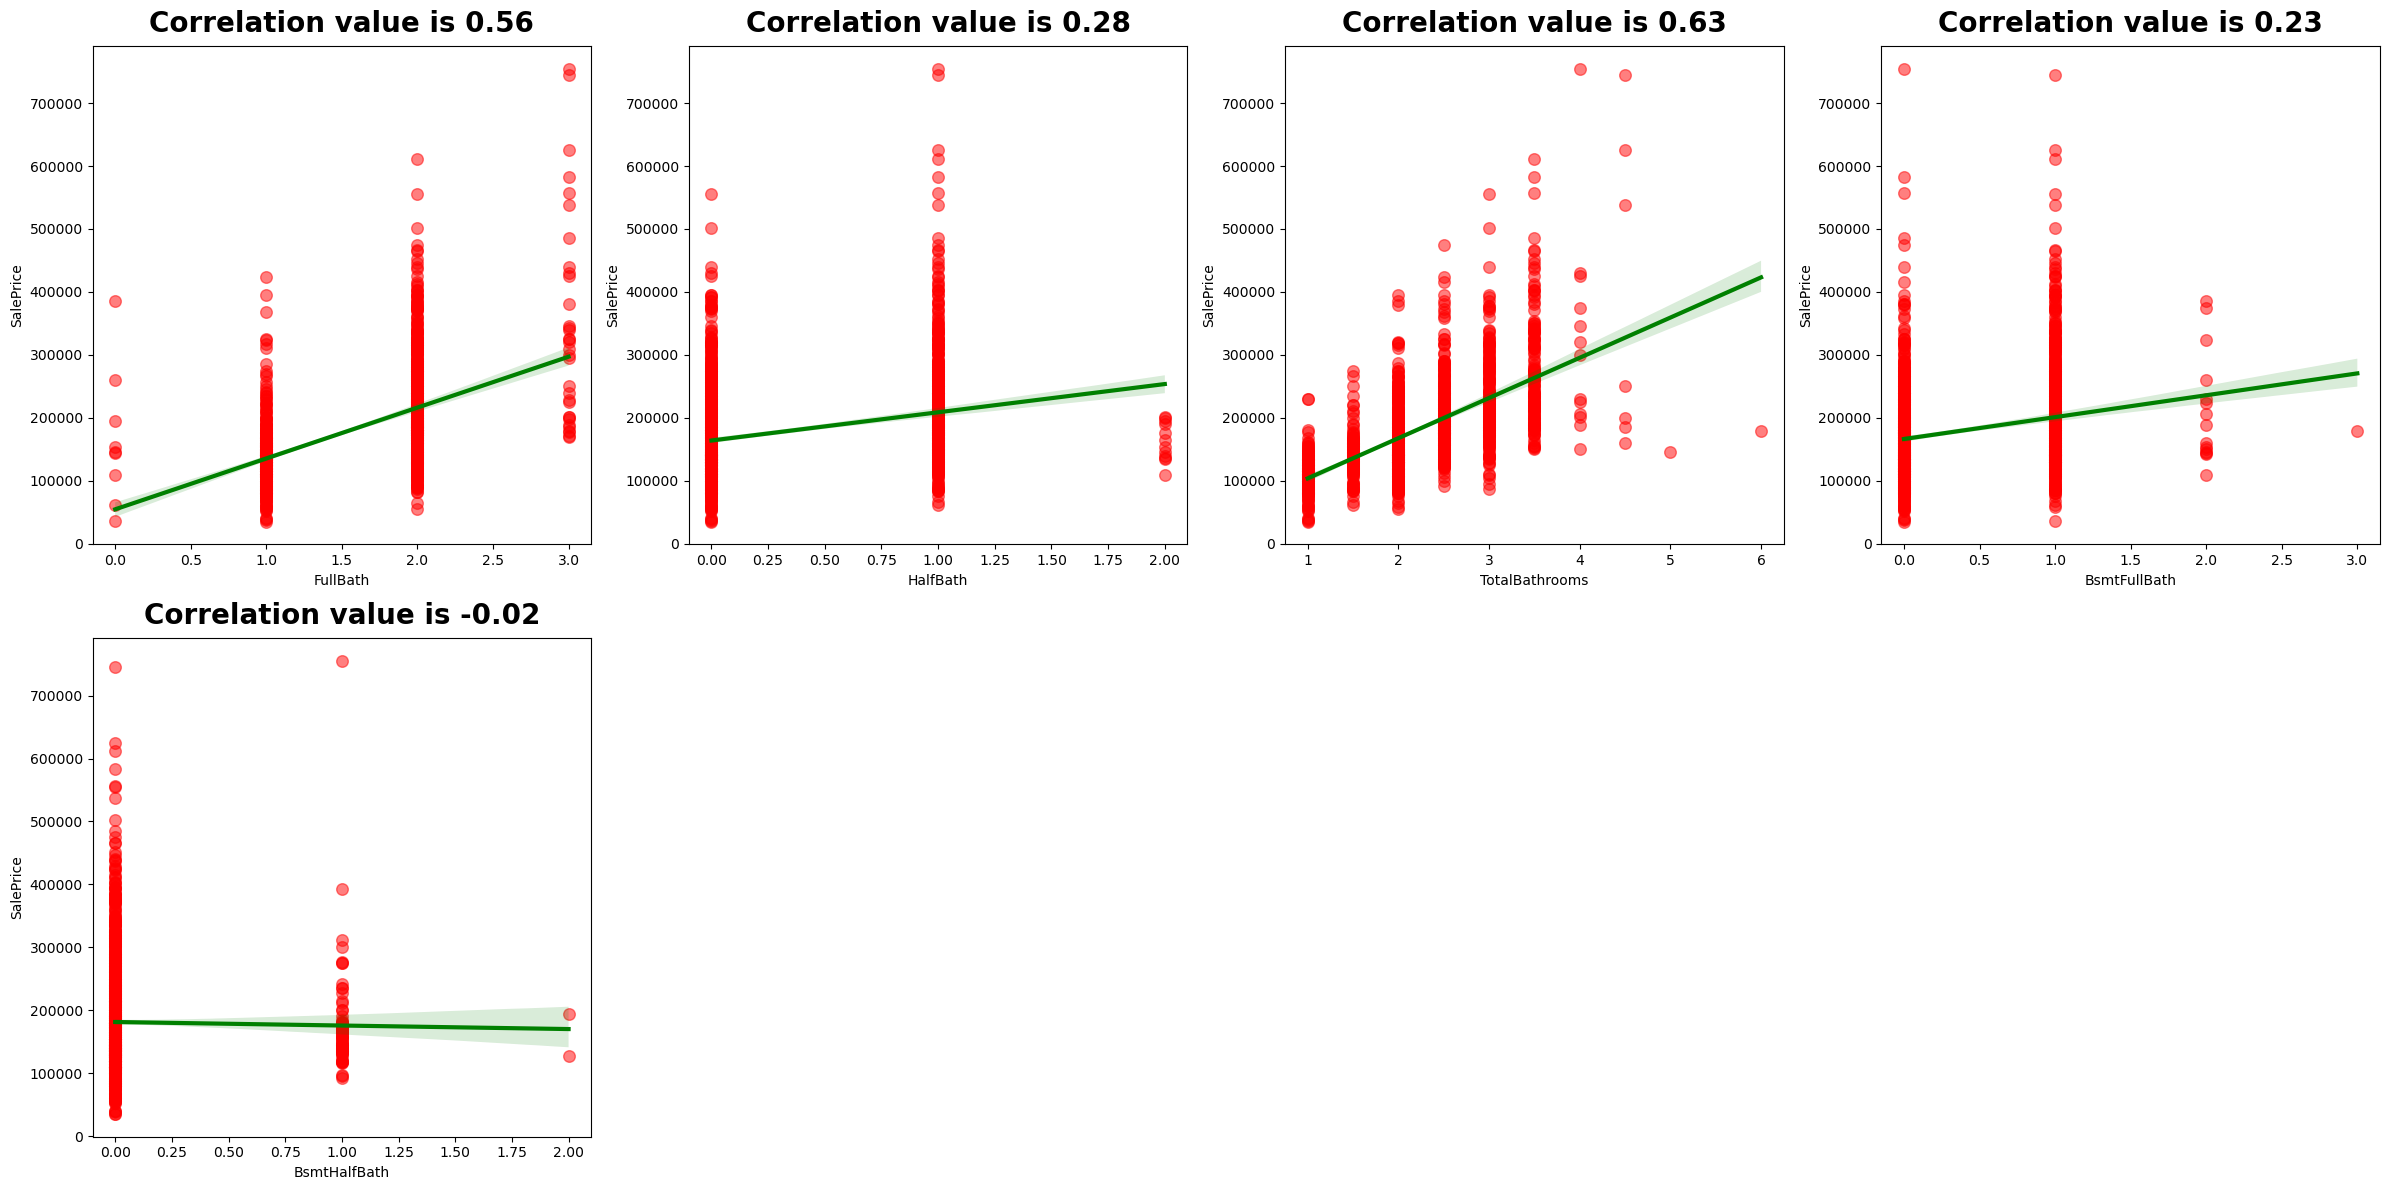

In [335]:
# Correlation between Feature-Column and Target-Column:
cols = ['FullBath', 'HalfBath','TotalBathrooms', 'BsmtFullBath', 'BsmtHalfBath']

plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=df1[column], y=df1["SalePrice"], color="red",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'green', 'lw': 3})
    corr = round(df1[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [336]:
# Dropping Features columns with weak correlation:
df1.drop(columns=['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'],inplace=True)

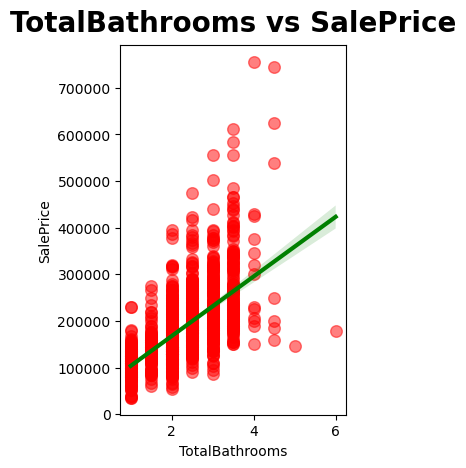

In [337]:
# Visualizing the New column created:
plt.subplot(1, 2, 2)
sns.regplot(x=df1["TotalBathrooms"], y=df1["SalePrice"], color="red",
            scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'green', 'lw': 3})
plt.title("TotalBathrooms vs SalePrice", pad=10, size=20, fontweight="black")
plt.show()

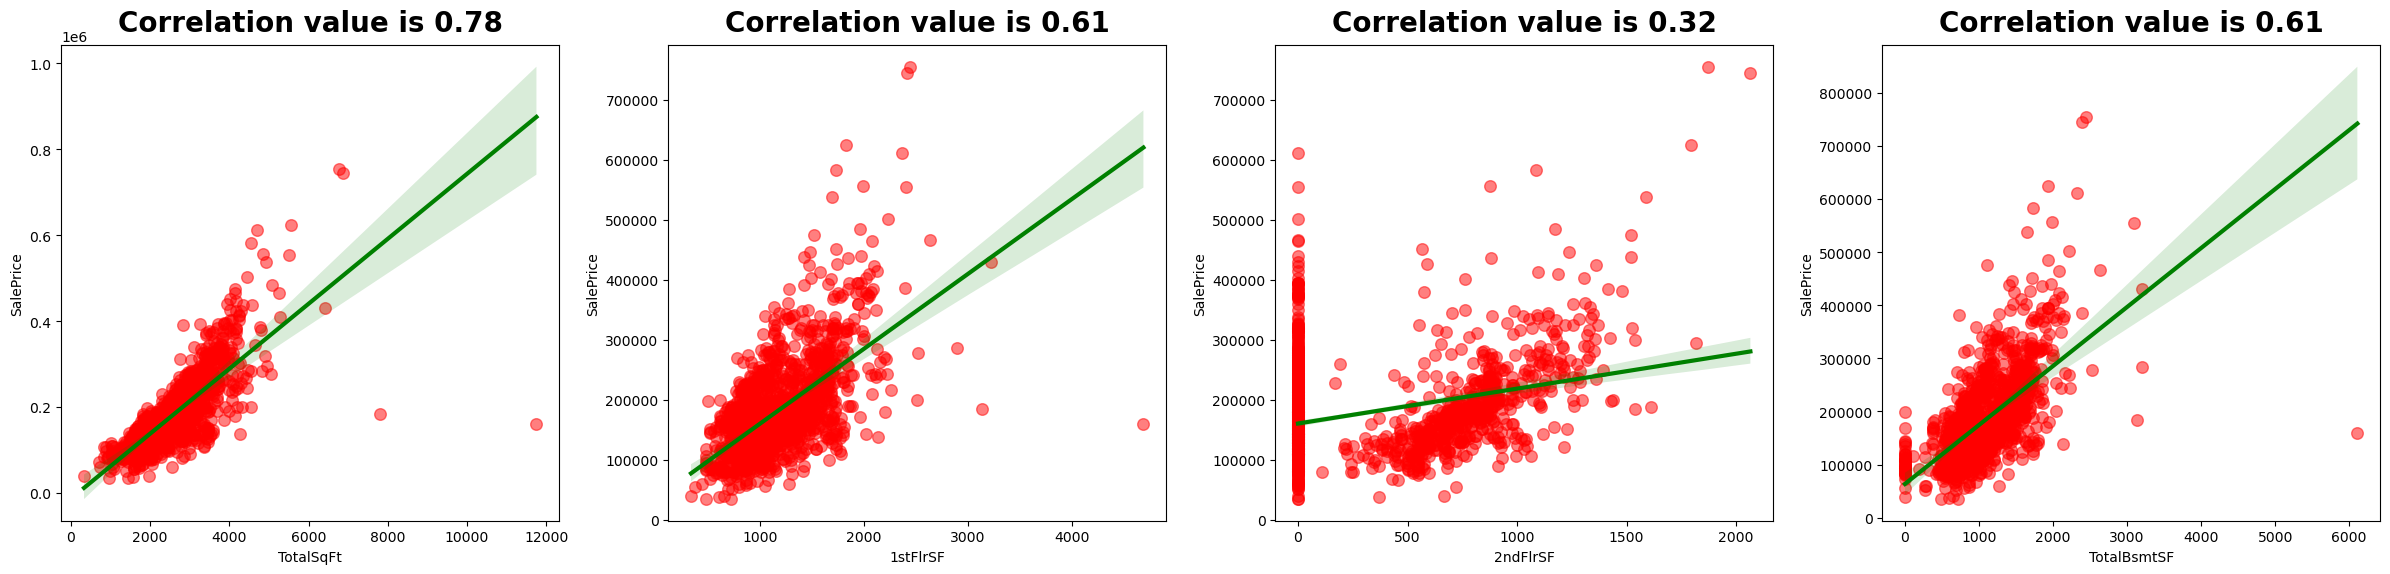

In [338]:
# Correlation between Feature-Column and Target-Column:
cols = ['TotalSqFt', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']

plt.figure(figsize=(24, 6))
for index, column in enumerate(cols):
    plt.subplot(1, 4, index + 1)
    sns.regplot(x=df1[column], y=df1["SalePrice"], color="red",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'green', 'lw': 3})
    corr = round(df1[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="bold")
plt.tight_layout()
plt.show()

In [339]:
# Dropping Features columns with weak correlation:
df1.drop(columns=['2ndFlrSF'],inplace=True)

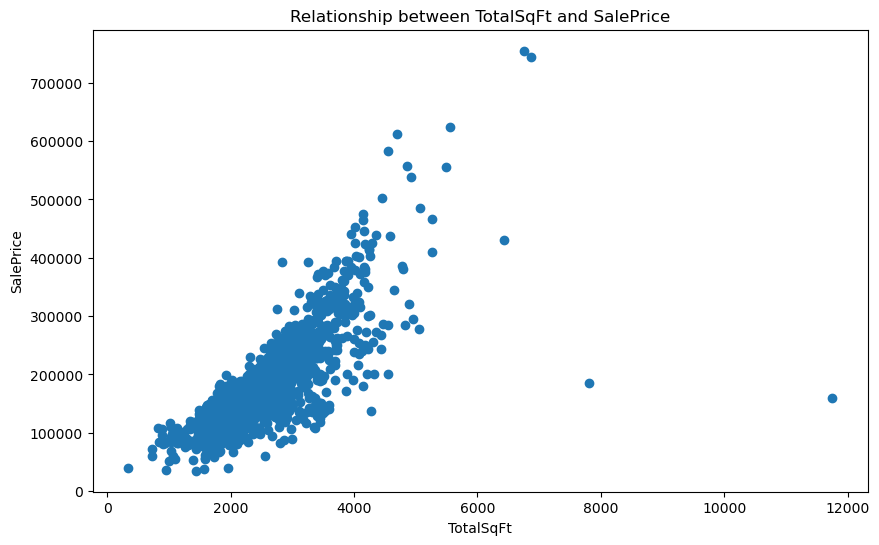

In [340]:
# Visualizing the New column created:
plt.figure(figsize=(10, 6))
plt.scatter(df1['TotalSqFt'],df1['SalePrice'])
plt.xlabel('TotalSqFt')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalSqFt and SalePrice')
plt.show()

In [341]:
# Calculate the total porch area:

df1['TotalPorchArea'] = df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['3SsnPorch'] + df1['ScreenPorch']
df1['TotalPorchArea']

0        61
1         0
2        42
3       307
4        84
       ... 
1455     40
1456      0
1457     60
1458    112
1459     68
Name: TotalPorchArea, Length: 1460, dtype: int64

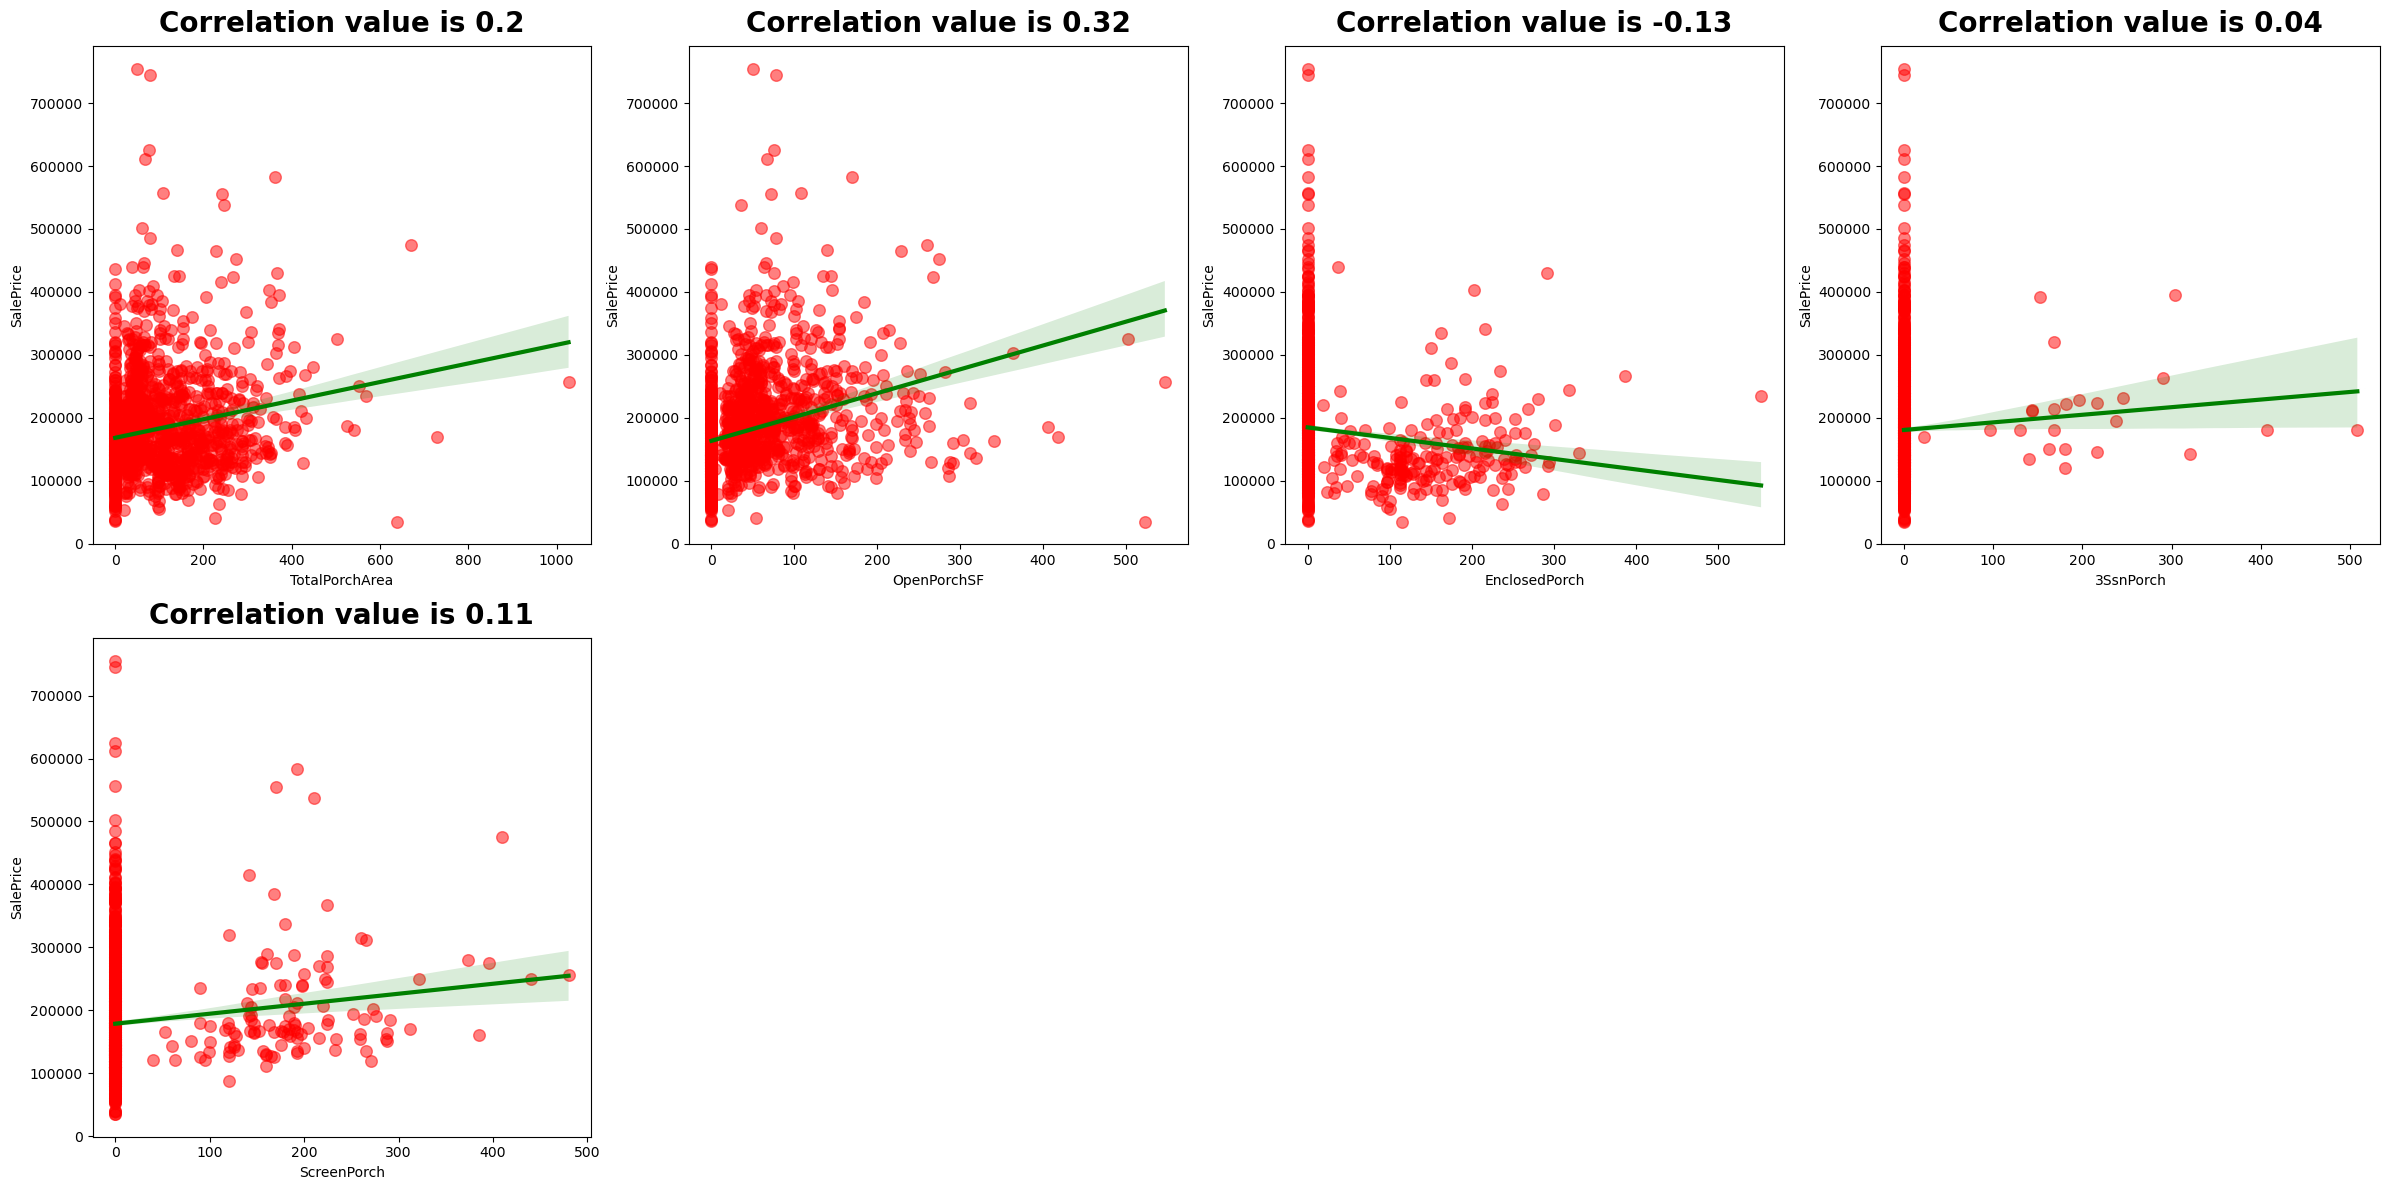

In [342]:
# Correlation between Feature-Column and Target-Column:
cols = ['TotalPorchArea', 'OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch']

plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=df1[column], y=df1["SalePrice"], color="red",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'green', 'lw': 3})
    corr = round(df1[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [343]:
# Dropping Features columns with weak correlation:
df1.drop(columns=['ScreenPorch','3SsnPorch','EnclosedPorch'],inplace=True)

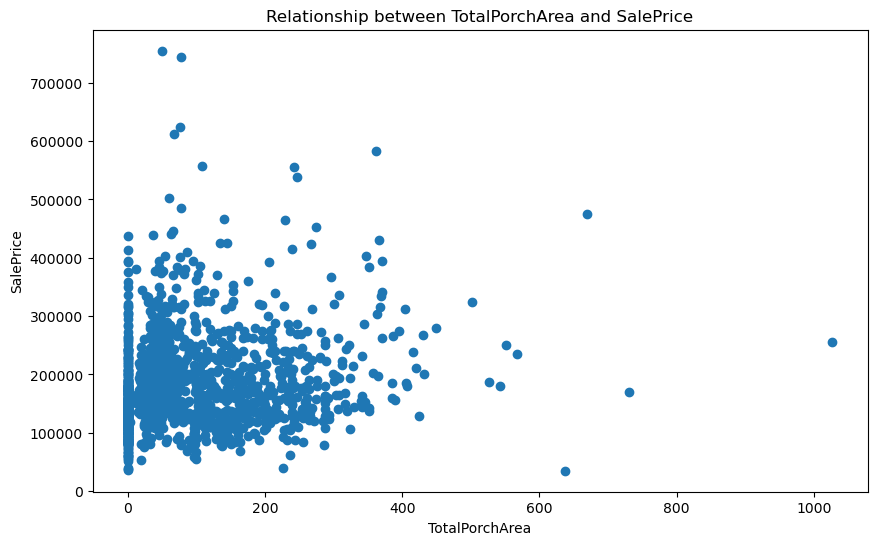

In [344]:
# Visualizing the New column created:
plt.figure(figsize=(10, 6))
plt.scatter(df1['TotalPorchArea'],df1['SalePrice'])
plt.xlabel('TotalPorchArea')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalPorchArea and SalePrice')
plt.show()

In [345]:
# Calculate the total finished square footage:
df1['TotalFinishedSqFt'] = df1['BsmtFinSF1'] + df1['BsmtFinSF2'] + df1['GrLivArea']
df1['TotalFinishedSqFt']

0       2416
1       2240
2       2272
3       1933
4       2853
        ... 
1455    1647
1456    3026
1457    2615
1458    2156
1459    2376
Name: TotalFinishedSqFt, Length: 1460, dtype: int64

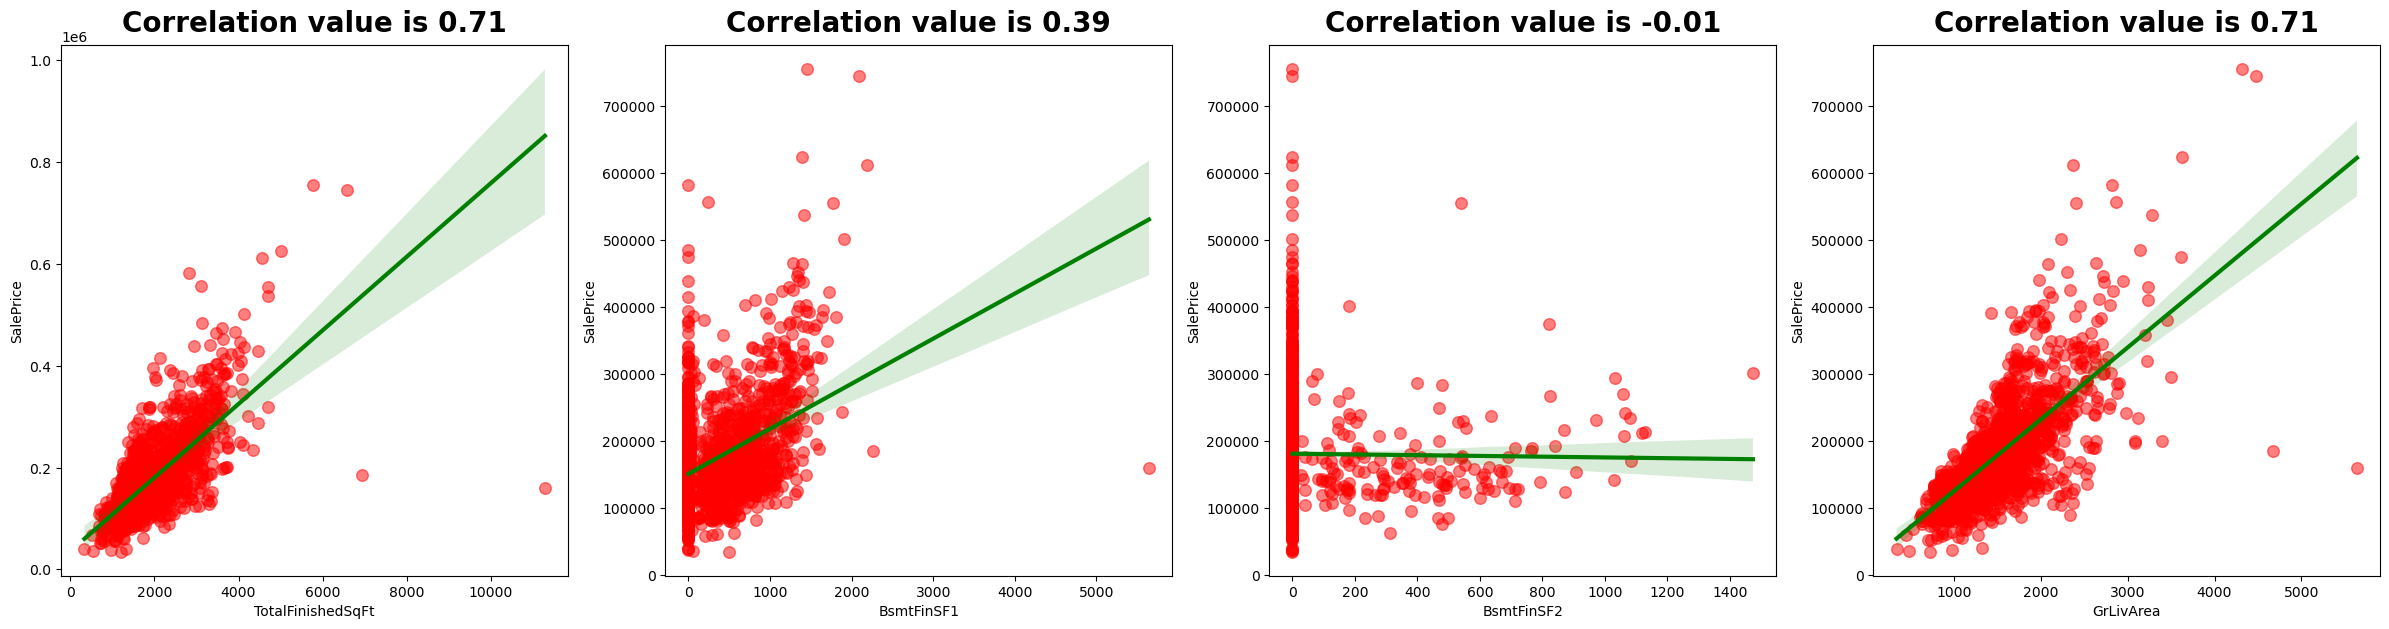

In [346]:
# Correlation between Feature-Column and Target-Column:
cols = ['TotalFinishedSqFt', 'BsmtFinSF1','BsmtFinSF2', 'GrLivArea']

plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=df1[column], y=df1["SalePrice"], color="red",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'green', 'lw': 3})
    corr = round(df1[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [347]:
# Dropping features columns with weak correlation:
df1.drop(columns=['BsmtFinSF2','BsmtFinSF1'],inplace=True)

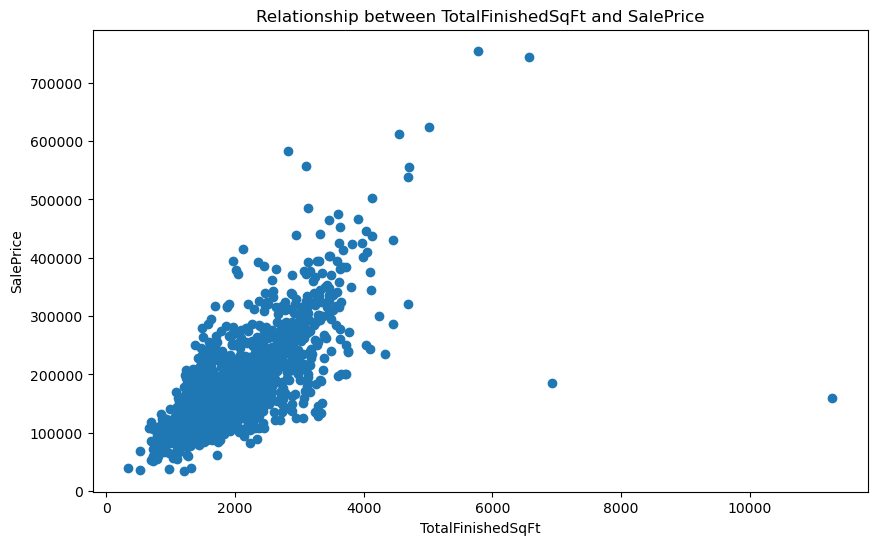

In [348]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['TotalFinishedSqFt'],df1['SalePrice'])
plt.xlabel('TotalFinishedSqFt')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalFinishedSqFt and SalePrice')
plt.show()

In [349]:
# Create total Quality-Score:
df1['TotalQualityScore'] = df1['OverallQual'] + df1['OverallCond']
df1['TotalQualityScore']

0       12
1       14
2       12
3       12
4       13
        ..
1455    11
1456    12
1457    16
1458    11
1459    11
Name: TotalQualityScore, Length: 1460, dtype: int64

In [350]:
# Create total Garage-Score:
df1['TotalGarageScore'] = df1['GarageCars'] *df1['GarageArea']
df1['TotalGarageScore']

0       1096
1        920
2       1216
3       1926
4       2508
        ... 
1455     920
1456    1000
1457     252
1458     240
1459     276
Name: TotalGarageScore, Length: 1460, dtype: int64

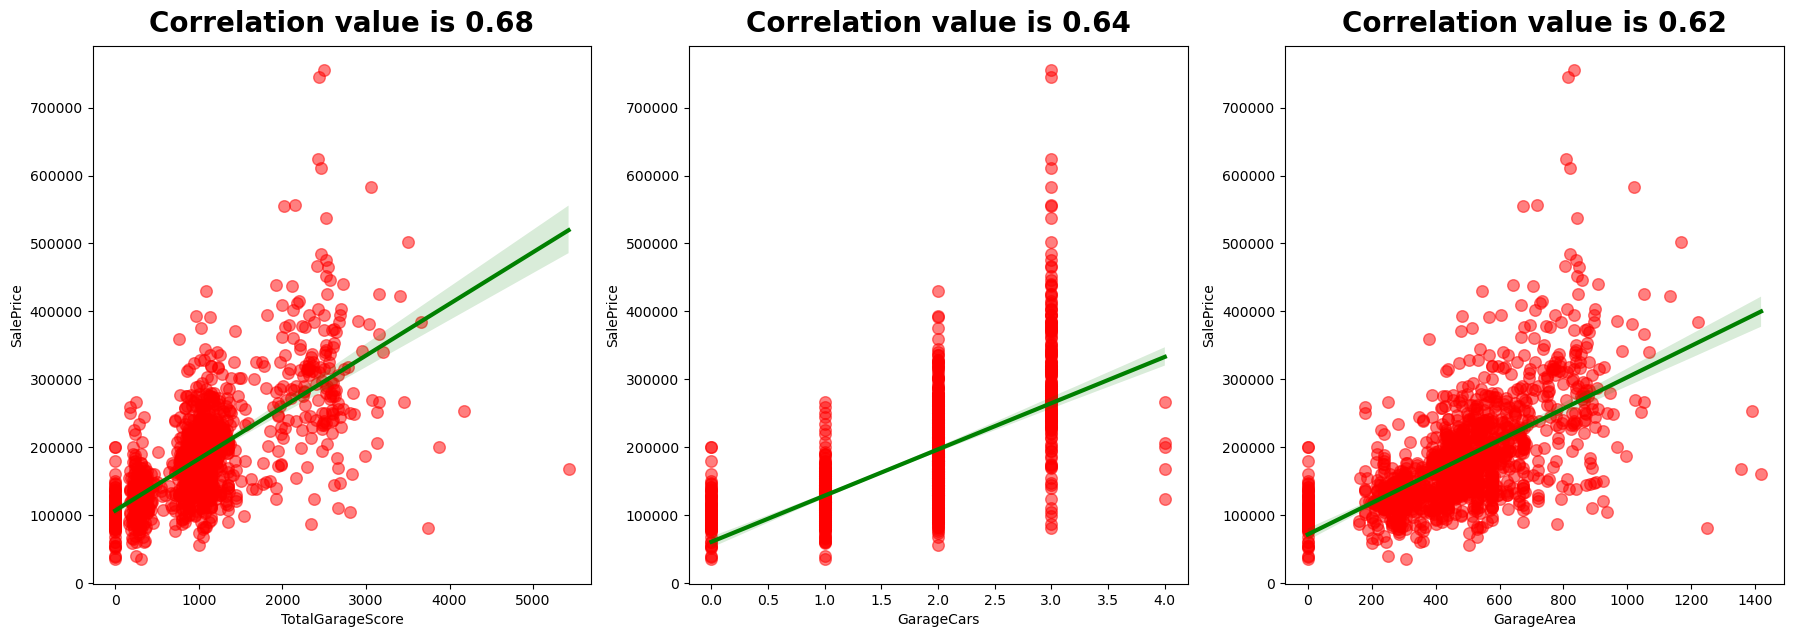

In [351]:
# Correlation between Feature-Column and Target-Column:
cols = ['TotalGarageScore', 'GarageCars','GarageArea']
plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=df1[column], y=df1["SalePrice"], color="red",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'green', 'lw': 3})
    corr = round(df1[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

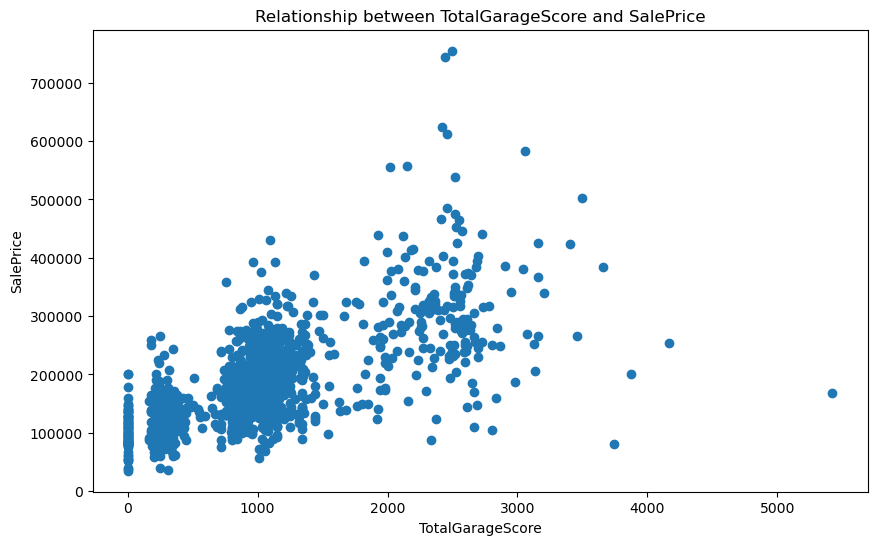

In [352]:
# Visualizing the New column created:
plt.figure(figsize=(10, 6))
plt.scatter(df1['TotalGarageScore'],df1['SalePrice'])
plt.xlabel('TotalGarageScore')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalGarageScore and SalePrice')
plt.show()

In [353]:
# Calculate the total outdoor-Area:
df1['TotalOutdoorArea'] = df1['WoodDeckSF'] + df1['OpenPorchSF'] +df1['PoolArea']
df1['TotalOutdoorArea']

0        61
1       298
2        42
3        35
4       276
       ... 
1455     40
1456    349
1457     60
1458    366
1459    804
Name: TotalOutdoorArea, Length: 1460, dtype: int64

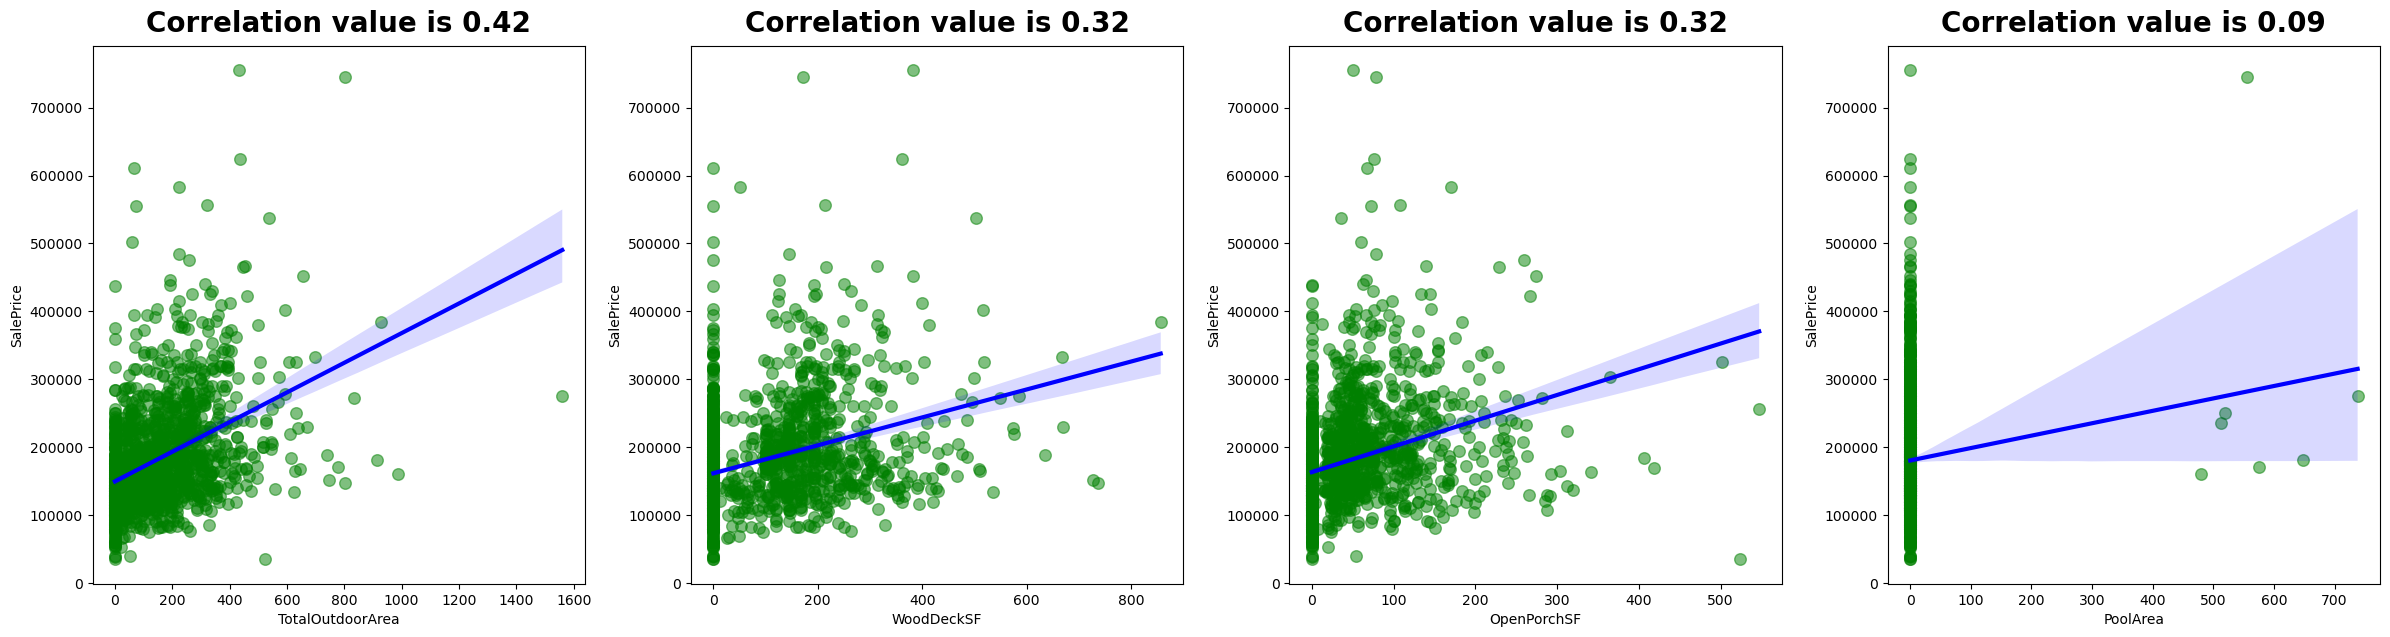

In [354]:
# Correlation between Feature-Column and Target-Column:
cols = ['TotalOutdoorArea', 'WoodDeckSF','OpenPorchSF','PoolArea']
plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=df1[column], y=df1["SalePrice"], color="green",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'Blue', 'lw': 3})
    corr = round(df1[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [355]:
# Dropping Features columns with weak correlation:
df1.drop(columns=['WoodDeckSF','OpenPorchSF','PoolArea'],inplace=True)

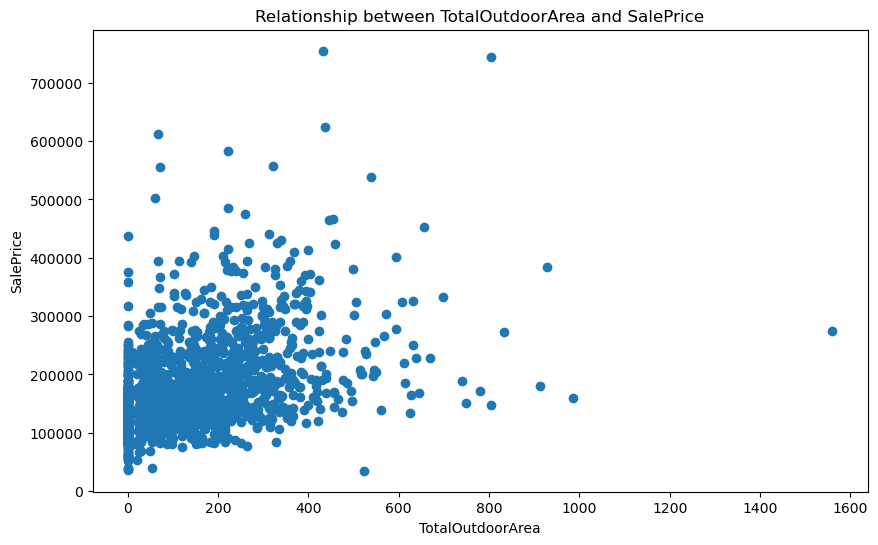

In [356]:
# Visualizing the New column created:
plt.figure(figsize=(10, 6))
plt.scatter(df1['TotalOutdoorArea'],df1['SalePrice'])
plt.xlabel('TotalOutdoorArea')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalOutdoorArea and SalePrice')
plt.show()

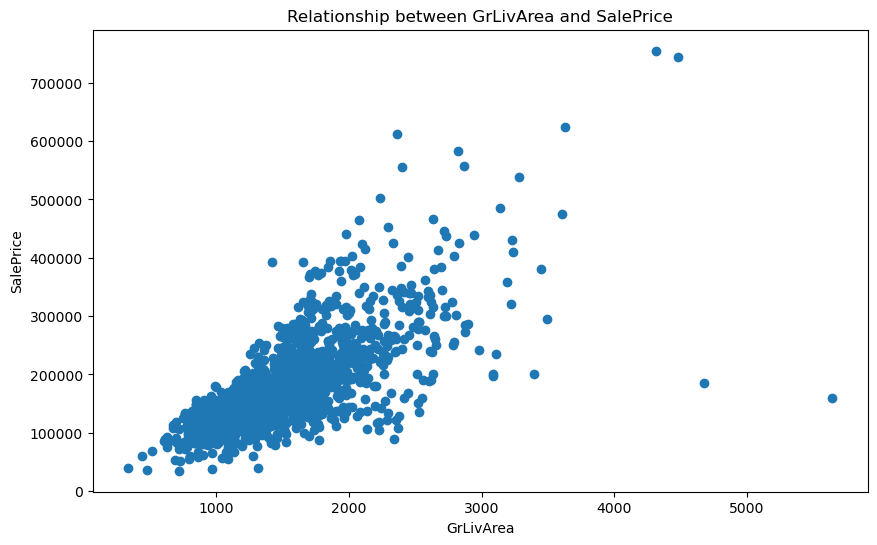

In [357]:
#Feature Engineering and Size Impact:
# Scatter-plot:
plt.figure(figsize=(10, 6))
plt.scatter(df1['GrLivArea'],df1['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Relationship between GrLivArea and SalePrice')
plt.show()

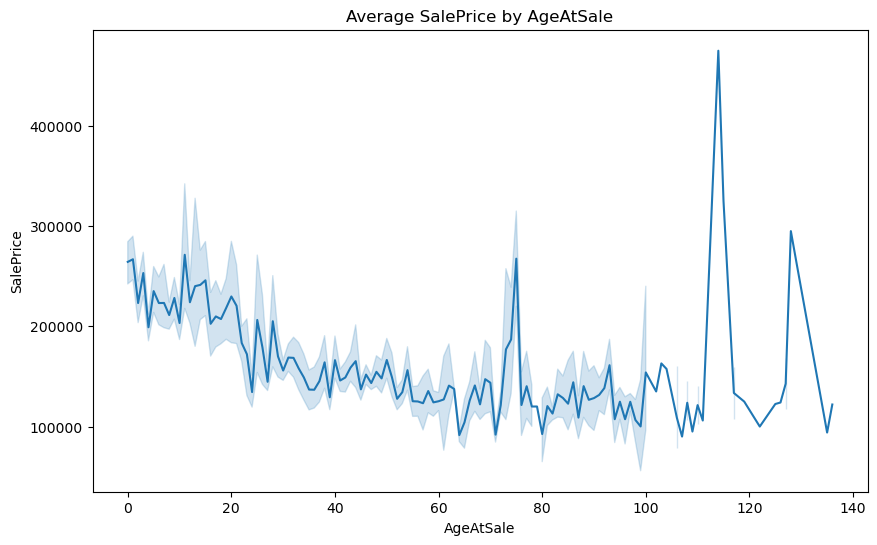

In [358]:
# Line-plot:
plt.figure(figsize=(10, 6))
sns.lineplot(x='AgeAtSale', y='SalePrice', data= df1)
plt.xlabel('AgeAtSale')
plt.ylabel('SalePrice')
plt.title('Average SalePrice by AgeAtSale')
plt.show()

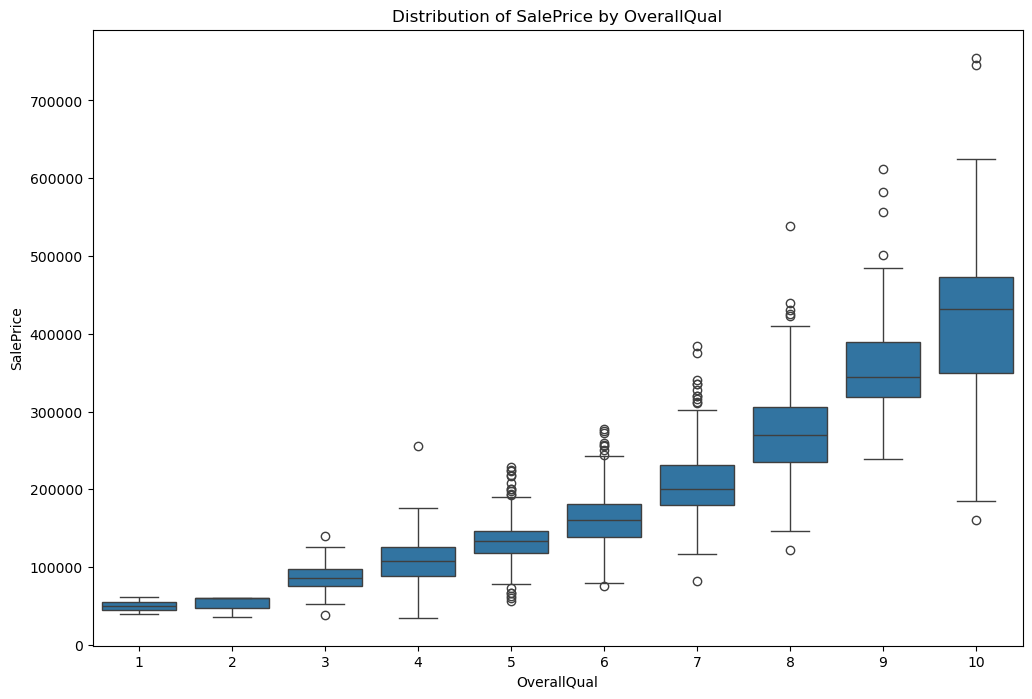

In [359]:
# Box-plot:
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data= df1) 
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Distribution of SalePrice by OverallQual')
plt.show()

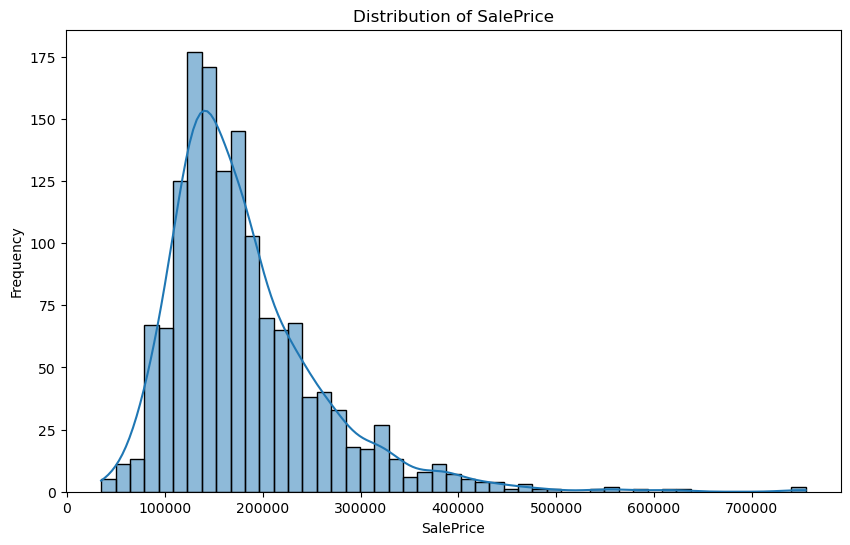

In [360]:
# Histogram:
plt.figure(figsize=(10, 6))
sns.histplot(df1['SalePrice'], kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()

In [361]:
df2 = df1.drop(['LotConfig','BldgType'], axis=1)

In [362]:
# Feature Engineering:
encoding_df2=pd.get_dummies(df2, columns= ['type of dwelling','MSZoning','Street','LotShape','LandContour',
       'Utilities','LandContour','LandSlope',
       'Neighborhood','Condition1','Condition2', 'type of dwelling', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],drop_first=True,dtype=int)

In [363]:
encoding_df2

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0              65     8450            7            5          2003   
1              80     9600            6            8          1976   
2              68    11250            7            5          2002   
3              60     9550            7            5          1970   
4              84    14260            8            5          2000   
...           ...      ...          ...          ...           ...   
1455           62     7917            6            5          2000   
1456           85    13175            6            6          1988   
1457           66     9042            7            9          2006   
1458           68     9717            5            6          1996   
1459           75     9937            5            6          1965   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  LowQualFinSF  ...  \
0            196        150          856       856             0  ...   
1              0        284         1262      1262             0  ...   
2            162        434          920       920             0  ...   
3              0        540          756       961             0  ...   
4            350        490         1145      1145             0  ...   
...          ...        ...          ...       ...           ...  ...   
1455           0        953          953       953             0  ...   
1456         119        589         1542      2073             0  ...   
1457           0        877         1152      1188             0  ...   
1458           0          0         1078      1078             0  ...   
1459           0        136         1256      1256             0  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0               0             0             0            1   
1                  0               0             0             0            1   
2                  0               0             0             0            1   
3                  0               0             0             0            1   
4                  0               0             0             0            1   
...              ...             ...           ...           ...          ...   
1455               0               0             0             0            1   
1456               0               0             0             0            1   
1457               0               0             0             0            1   
1458               0               0             0             0            1   
1459               0               0             0             0            1   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     0   
1456                     0                     0                     0   
1457                     0                     0                     0   
1458                     0                     0                     0   
1459                     0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456      

In [364]:
encoding_df2['TotalSqFt']

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: TotalSqFt, Length: 1460, dtype: int64

In [365]:
# Total Total-Bathrooms column:
encoding_df2['TotalBathrooms']

0       3.5
1       2.5
2       3.5
3       2.0
4       3.5
       ... 
1455    2.5
1456    3.0
1457    2.0
1458    2.0
1459    2.5
Name: TotalBathrooms, Length: 1460, dtype: float64

In [366]:
# Normalize Numerical Features:

In [367]:
from sklearn.preprocessing import MinMaxScaler

In [368]:
scaler = MinMaxScaler()
encoding_df2[['TotalSqFt', 'TotalBathrooms']] = scaler.fit_transform(encoding_df2[['TotalSqFt', 'TotalBathrooms']])

In [369]:
df2[['TotalSqFt', 'TotalBathrooms']]

TotalSqFt  TotalBathrooms
0          2566             3.5
1          2524             2.5
2          2706             3.5
3          2473             2.0
4          3343             3.5
...         ...             ...
1455       2600             2.5
1456       3615             3.0
1457       3492             2.0
1458       2156             2.0
1459       2512             2.5

[1460 rows x 2 columns]

In [372]:
# Feature Selection:

In [378]:
selected_features = ['TotalSqFt', 'TotalBathrooms', 'Neighborhood_NAmes', 'HouseStyle_2Story']
x = encoding_df2[selected_features]
y = encoding_df2['SalePrice']

In [379]:
x

TotalSqFt  TotalBathrooms  Neighborhood_NAmes  HouseStyle_2Story
0      0.195481             0.5                   0                  1
1      0.191802             0.3                   0                  0
2      0.207742             0.5                   0                  1
3      0.187336             0.2                   0                  1
4      0.263531             0.5                   0                  1
...         ...             ...                 ...                ...
1455   0.198459             0.3                   0                  1
1456   0.287353             0.4                   0                  0
1457   0.276581             0.2                   0                  1
1458   0.159573             0.2                   1                  0
1459   0.190751             0.3                   0                  0

[1460 rows x 4 columns]

In [383]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [387]:
# Model Building:

In [388]:
from sklearn.model_selection import train_test_split

In [389]:
X=encoding_df2.drop('SalePrice',axis=1)
Y=encoding_df2.SalePrice

In [390]:
x

TotalSqFt  TotalBathrooms  Neighborhood_NAmes  HouseStyle_2Story
0      0.195481             0.5                   0                  1
1      0.191802             0.3                   0                  0
2      0.207742             0.5                   0                  1
3      0.187336             0.2                   0                  1
4      0.263531             0.5                   0                  1
...         ...             ...                 ...                ...
1455   0.198459             0.3                   0                  1
1456   0.287353             0.4                   0                  0
1457   0.276581             0.2                   0                  1
1458   0.159573             0.2                   1                  0
1459   0.190751             0.3                   0                  0

[1460 rows x 4 columns]

In [391]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [392]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [395]:
X_train

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
254            70     8400            5            6          1957   
1066           59     7837            6            7          1994   
638            67     8777            5            7          1950   
799            60     7200            5            7          1950   
380            50     5000            5            6          1950   
...           ...      ...          ...          ...           ...   
1095           78     9317            6            5          2006   
1130           65     7804            4            3          1950   
1294           60     8172            5            7          1990   
860            55     7642            7            8          1998   
1126           53     3684            7            5          2007   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  LowQualFinSF  ...  \
254            0        392         1314      1314             0  ...   
1066           0        799          799       799             0  ...   
638            0        796          796       796             0  ...   
799          252        162          731       981             0  ...   
380            0        808         1026      1026             0  ...   
...          ...        ...          ...       ...           ...  ...   
1095           0       1290         1314      1314             0  ...   
1130           0        500         1122      1328             0  ...   
1294           0        697          864       864             0  ...   
860            0        912          912       912             0  ...   
1126         130       1373         1373      1555             0  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
254                0               0             0             0            1   
1066               0               0             0             0            1   
638                0               0             0             0            1   
799                0               0             0             0            1   
380                0               0             0             0            1   
...              ...             ...           ...           ...          ...   
1095               0               0             0             0            1   
1130               0               0             0             0            1   
1294               0               0             0             0            1   
860                0               0             0             0            1   
1126               0               0             0             0            1   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
254                      0                     0                     0   
1066                     0                     0                     0   
638                      0                     0                     0   
799                      0                     0                     0   
380                      0                     0                     0   
...                    ...                   ...                   ...   
1095                     0                     0                     0   
1130                     0                     0                     0   
1294                     0                     0                     0   
860                      0                     0                     0   
1126                     0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
254                      1                      0  
1066                     1                      0  
638                      1                      0  
799                      1                      0  
380                      1                      0  
...                    ...                    ...  
1095                     1                      0  
1130      

In [396]:
Y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [398]:
X_test

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
892            70     8414            6            8          2003   
1105           98    12256            8            5          1995   
413            56     8960            5            6          1950   
522            50     5000            6            7          1950   
1036           89    12898            9            5          2008   
...           ...      ...          ...          ...           ...   
479            50     5925            4            7          2000   
1361          124    16158            7            5          2005   
802            63     8199            7            5          2005   
651            60     9084            4            5          1950   
722            70     8120            4            7          1970   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  LowQualFinSF  ...  \
892            0        396         1059      1068             0  ...   
1105         362        431         1463      1500             0  ...   
413            0       1008         1008      1028             0  ...   
522            0        605         1004      1004             0  ...   
1036          70        598         1620      1620             0  ...   
...          ...        ...          ...       ...           ...  ...   
479          435        739          907      1131             0  ...   
1361          16        256         1530      1530             0  ...   
802            0         80          728       728             0  ...   
651            0        755          755       755             0  ...   
722            0        673          864       864             0  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
892                0               0             0             0            1   
1105               0               0             0             0            1   
413                0               0             0             0            1   
522                0               0             0             0            1   
1036               0               0             0             0            1   
...              ...             ...           ...           ...          ...   
479                0               0             0             0            1   
1361               0               0             0             0            1   
802                0               0             0             0            1   
651                0               0             0             0            1   
722                0               0             0             0            1   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
892                      0                     0                     0   
1105                     0                     0                     0   
413                      0                     0                     0   
522                      0                     0                     0   
1036                     0                     0                     0   
...                    ...                   ...                   ...   
479                      0                     1                     0   
1361                     0                     0                     0   
802                      0                     0                     0   
651                      0                     0                     0   
722                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
892                      1                      0  
1105                     1                      0  
413                      1                      0  
522                      1                      0  
1036                     1                      0  
...                    ...                    ...  
479                      0                      0  
1361      

In [399]:
Y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [400]:
# Market Trends and Historical Pricing:
# Convert Date Information:
# Convert 'MoSold' and 'YrSold' to a datetime column:

In [401]:
df2['DateSold'] = pd.to_datetime(df2['YrSold'].astype(str) + '-' + df2['MoSold'].astype(str))
df2['DateSold']

0      2008-02-01
1      2007-05-01
2      2008-09-01
3      2006-02-01
4      2008-12-01
          ...    
1455   2007-08-01
1456   2010-02-01
1457   2010-05-01
1458   2010-04-01
1459   2008-06-01
Name: DateSold, Length: 1460, dtype: datetime64[ns]

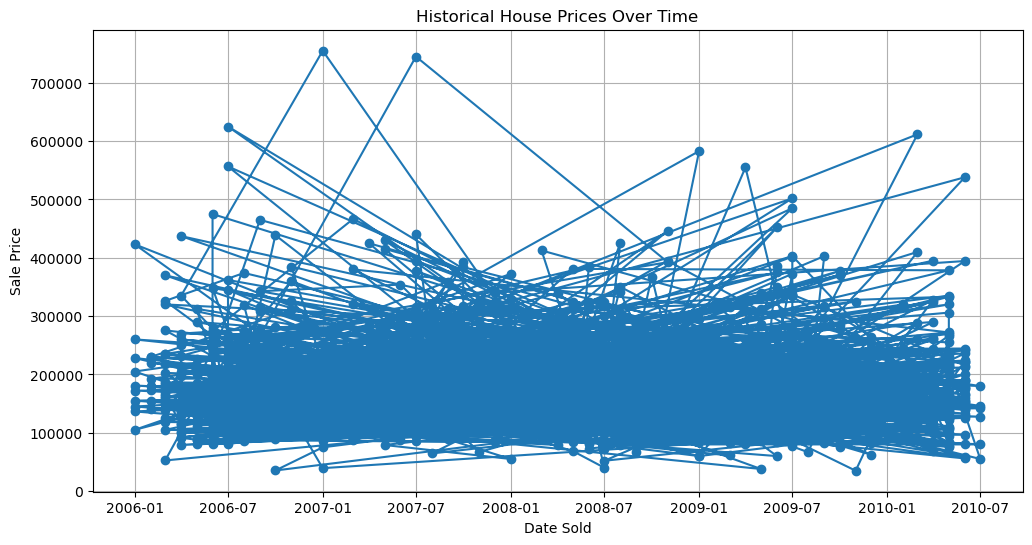

In [402]:
# Plotting historical prices:
plt.figure(figsize=(12, 6))
plt.plot(df2['DateSold'],df2['SalePrice'], marker='o')
plt.title('Historical House Prices Over Time')
plt.xlabel('Date Sold')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

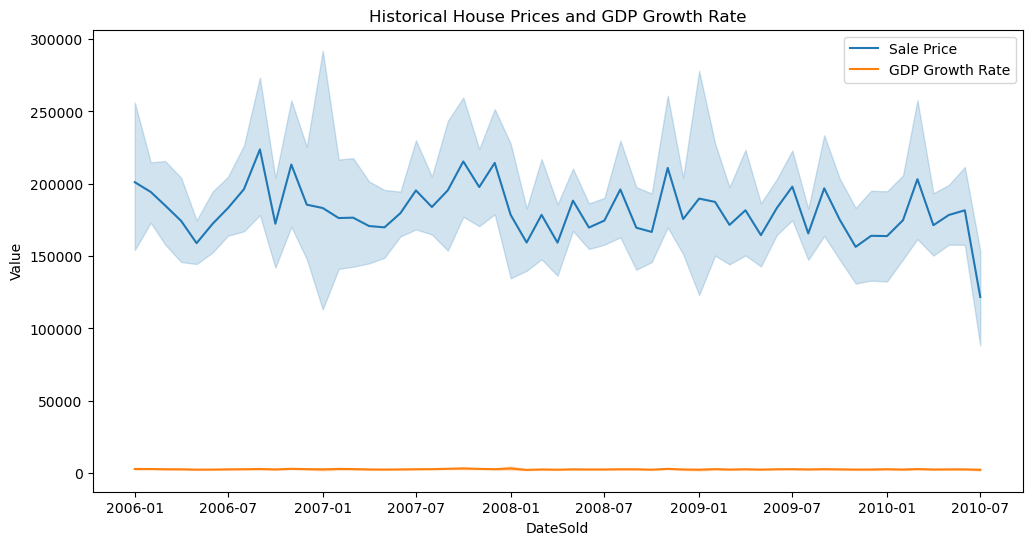

In [403]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='DateSold', y='SalePrice', label='Sale Price')
sns.lineplot(data=df2, x='DateSold', y='TotalSqFt', label='GDP Growth Rate')
plt.title('Historical House Prices and GDP Growth Rate')
plt.xlabel('DateSold')
plt.ylabel('Value')
plt.legend()
plt.show()

In [408]:
# Group the data by year and calculate the average house price for each year:
Avg_price_year =df2.groupby('YrSold')['SalePrice'].mean()
Avg_price_year

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

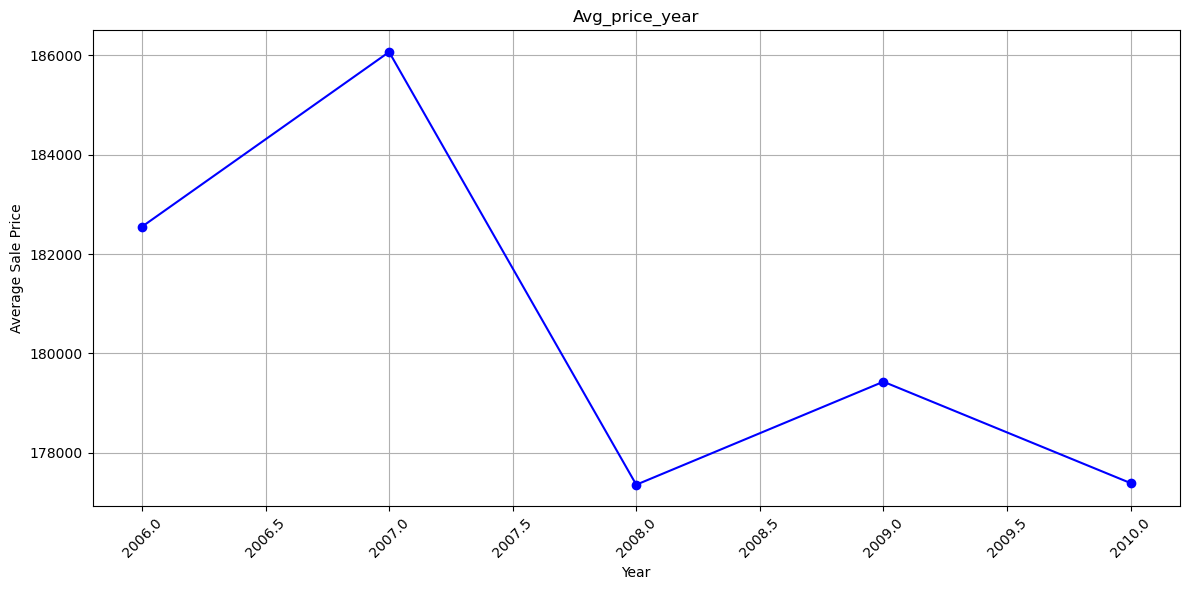

In [409]:
plt.figure(figsize=(12, 6))
plt.plot(Avg_price_year.index, Avg_price_year.values, marker='o', color='b', linestyle='-')
plt.title('Avg_price_year')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [410]:
# Perform seasonal decomposition:

In [411]:
import statsmodels.api as sm

In [412]:
decomposition = sm.tsa.seasonal_decompose(df2['SalePrice'], model='additive', period=12)
decomposition

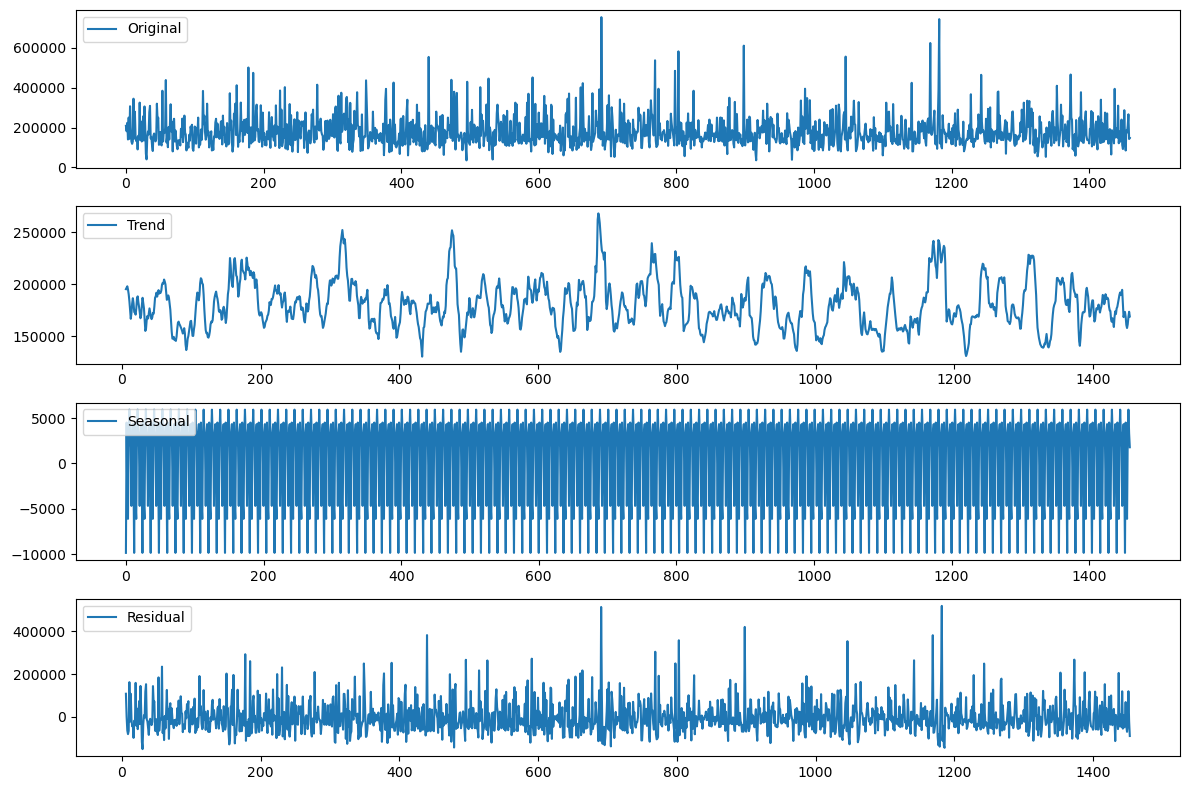

In [413]:
# Decomposition-plot:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df2['SalePrice'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [414]:
print(df2.columns)

Index(['type of dwelling', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'PricePerSqFt', 'AgeAtSale',
       'TotalSqFt', 'Tota

In [419]:
# Identify the columns related to amenities or features that may impact house prices:
amenities_columns = [ 'GarageArea', 'Fireplaces']

In [420]:
amenities_data =df2[amenities_columns]

In [421]:
print(amenities_data.head())

   GarageArea  Fireplaces
0         548           0
1         460           1
2         608           1
3         642           1
4         836           1


In [422]:
# Analyze Impact:

In [423]:
# Create a Box-plot to compare house prices with and without a Total Outdoor Area:

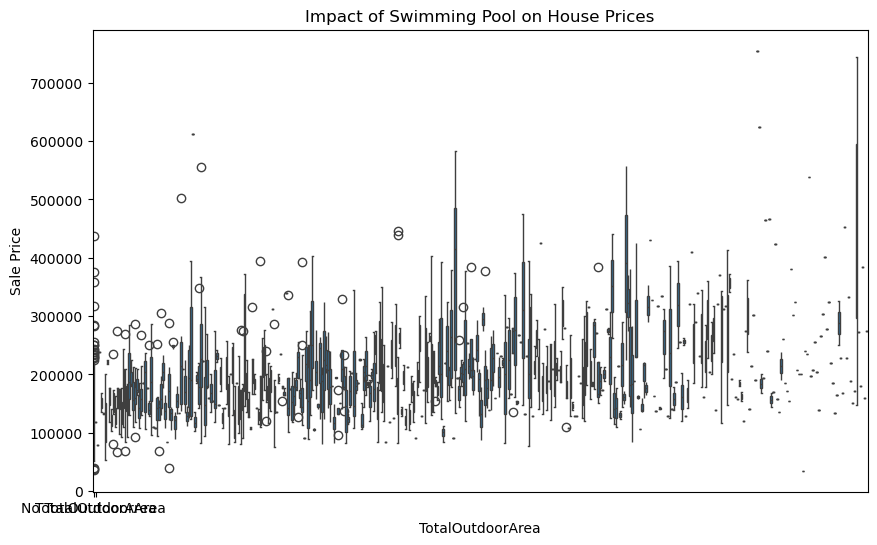

In [424]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalOutdoorArea', y='SalePrice', data=df2)
plt.title('Impact of Swimming Pool on House Prices')
plt.xlabel('TotalOutdoorArea')
plt.ylabel('Sale Price')
plt.xticks([0, 1], ['No TotalOutdoorArea', 'TotalOutdoorArea'])
plt.show()